In [1]:
import pandas as pd
from matplotlib import pyplot as plt

#Transazioni anonime con carta di credito etichettate come fraudolente o autentiche
data=pd.read_csv('C:/Users/ds97/Desktop/creditcard.csv')

genuine = data[data['Class'] == 0].reset_index().filter(['Time', 'Amount', 'Class'])
fraudolent = data[data['Class'] == 1].reset_index().filter(['Time', 'Amount', 'Class'])
transaction = data.filter(['V7', 'Amount', 'V5', 'Time', 'Class'])
time = data.filter(['Time'])
amount = data.filter(['Amount'])
data_v1_v10 = data.filter(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Class'])
data_v11_v20 = data.filter(['V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'Class'])
data_v21_v28 = data.filter(['V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'])
tmp = data[0:100]

datasetf = data[data['Amount'] < 2200].reset_index()

print(fraudolent.max())

#fraudolent.head()

Time      170348.00
Amount      2125.87
Class          1.00
dtype: float64


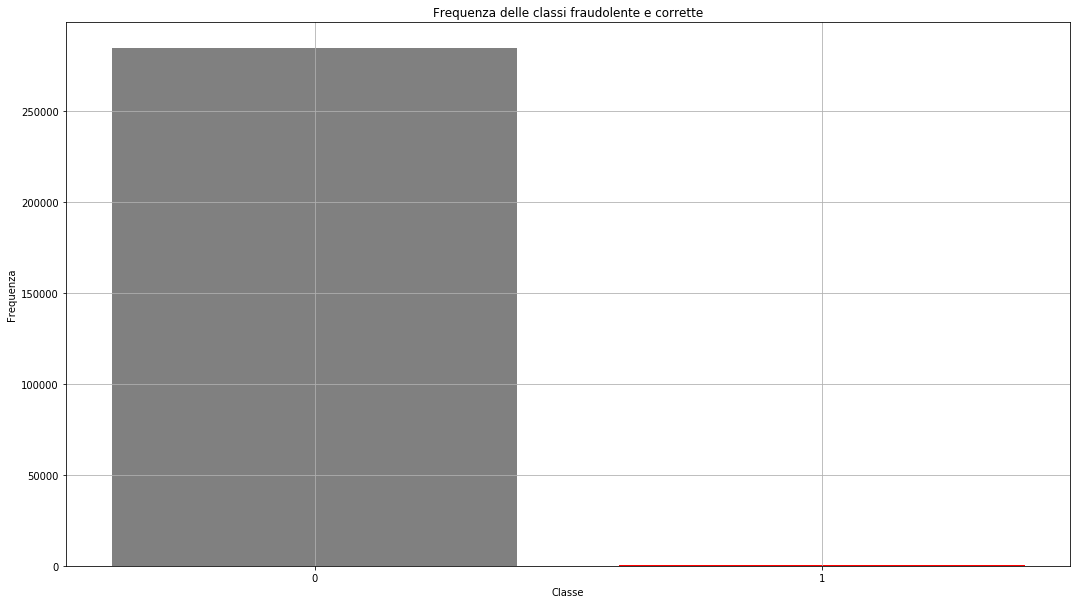

In [38]:
plt.figure(figsize=(18,10))
class_count = data['Class'].value_counts().sort_index()
plt.bar(class_count.index, class_count, color=['gray', 'red'])
plt.xticks(range(2))
plt.title("Frequenza delle classi fraudolente e corrette")
plt.xlabel("Classe")
plt.ylabel("Frequenza");
plt.grid()
plt.show()

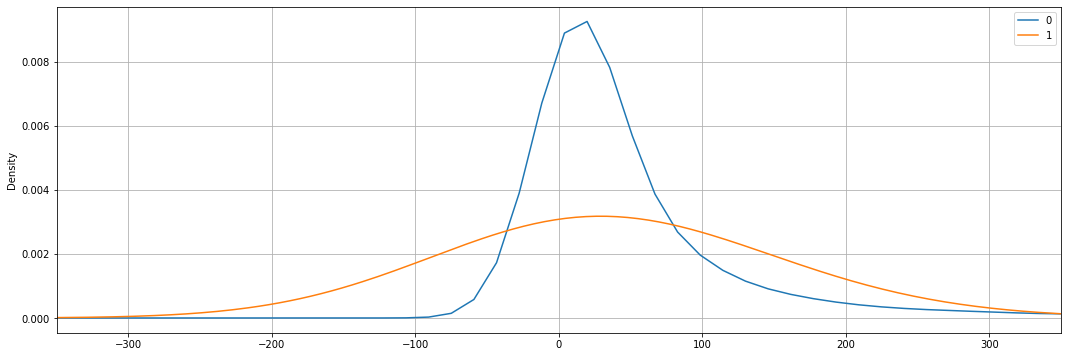

In [28]:
plt.figure(figsize=(18,6))
plt.xlim(-350, 350)
tmp.groupby('Class')['Amount'].plot.density()
plt.legend()
plt.grid()
plt.show()

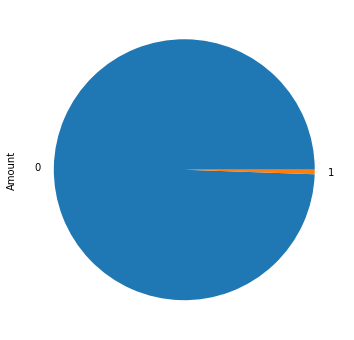

In [29]:
plt.figure(figsize = (18,6))
tmp.groupby('Class')['Amount'].sum().plot.pie()
plt.grid()
plt.show()

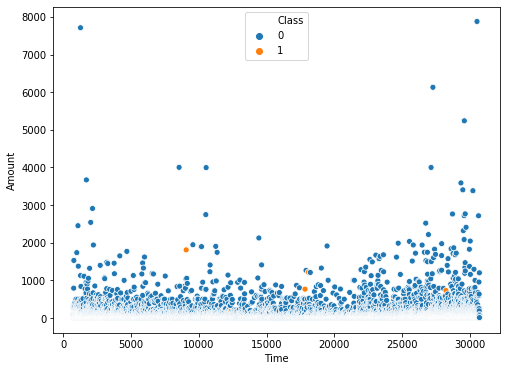

In [33]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(tmp['Time'], tmp['Amount'], hue=tmp['Class'])
plt.show()

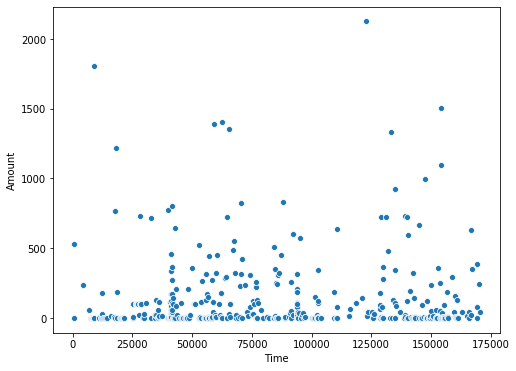

In [3]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(fraudolent['Time'], fraudolent['Amount'])
plt.show()

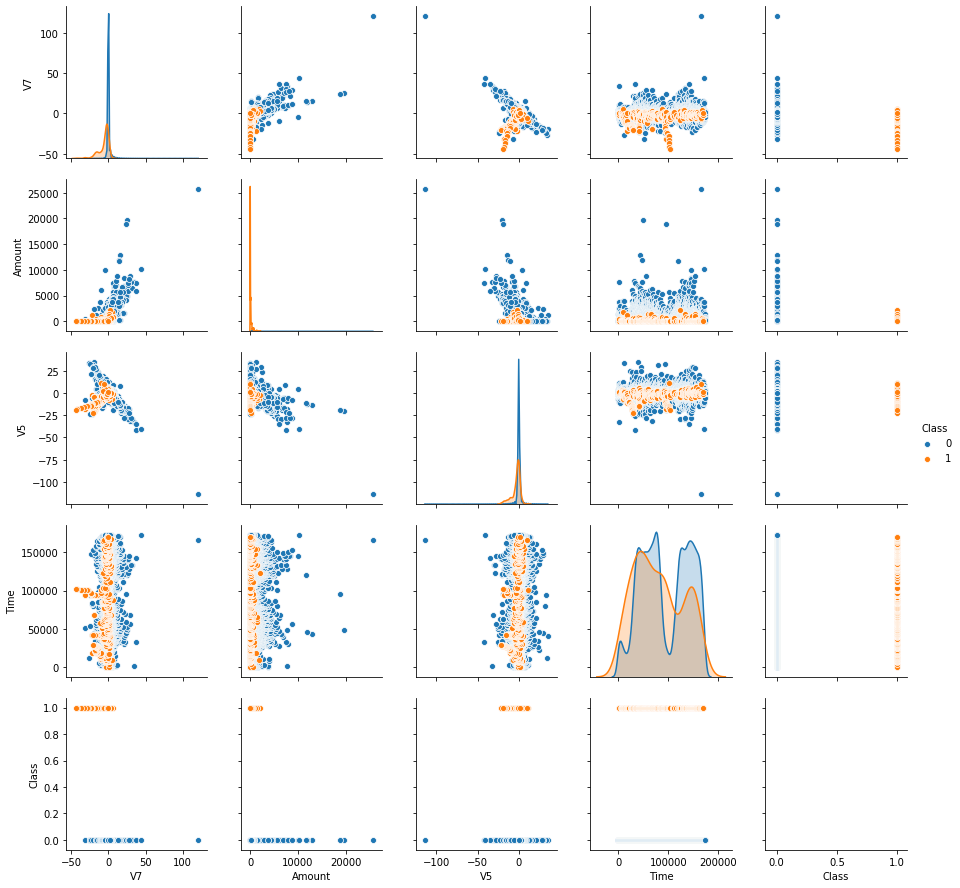

In [11]:
sns.pairplot(transaction, hue = 'Class')
plt.show()

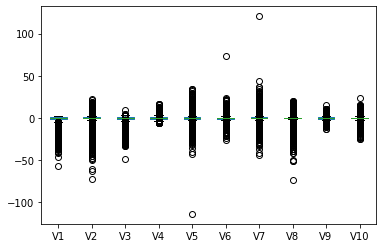

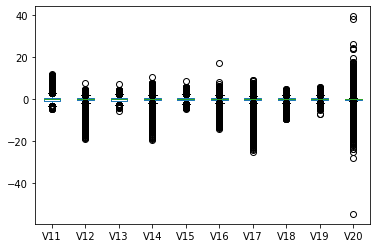

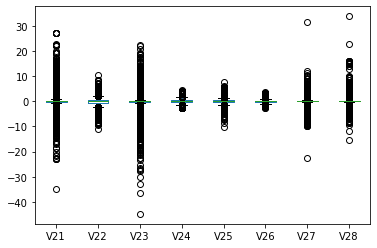

In [28]:
data_v1_v10.plot.box()
data_v11_v20.plot.box()
data_v21_v28.plot.box()
plt.show()

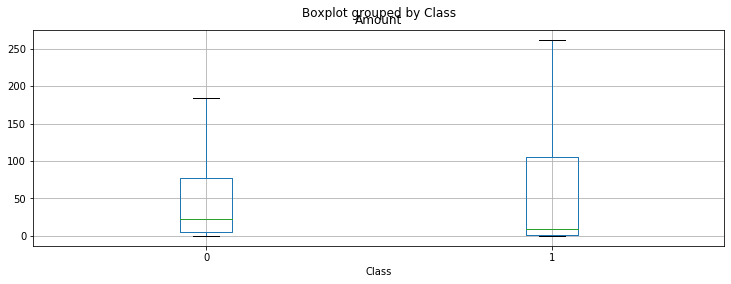

In [36]:
data.boxplot(by = 'Class', column = ['Amount'], figsize = (12,4), showfliers=False)
plt.show()

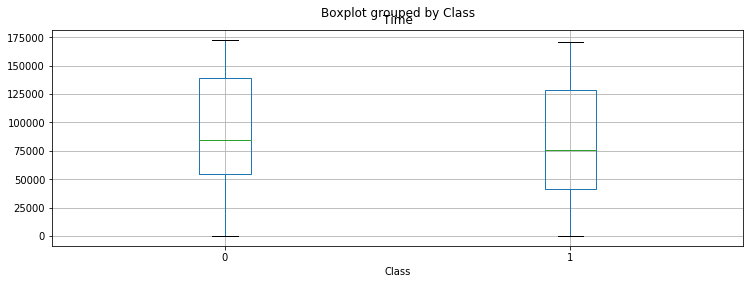

In [37]:
data.boxplot(by = 'Class', column = ['Time'], figsize = (12,4), showfliers=False)
plt.show()

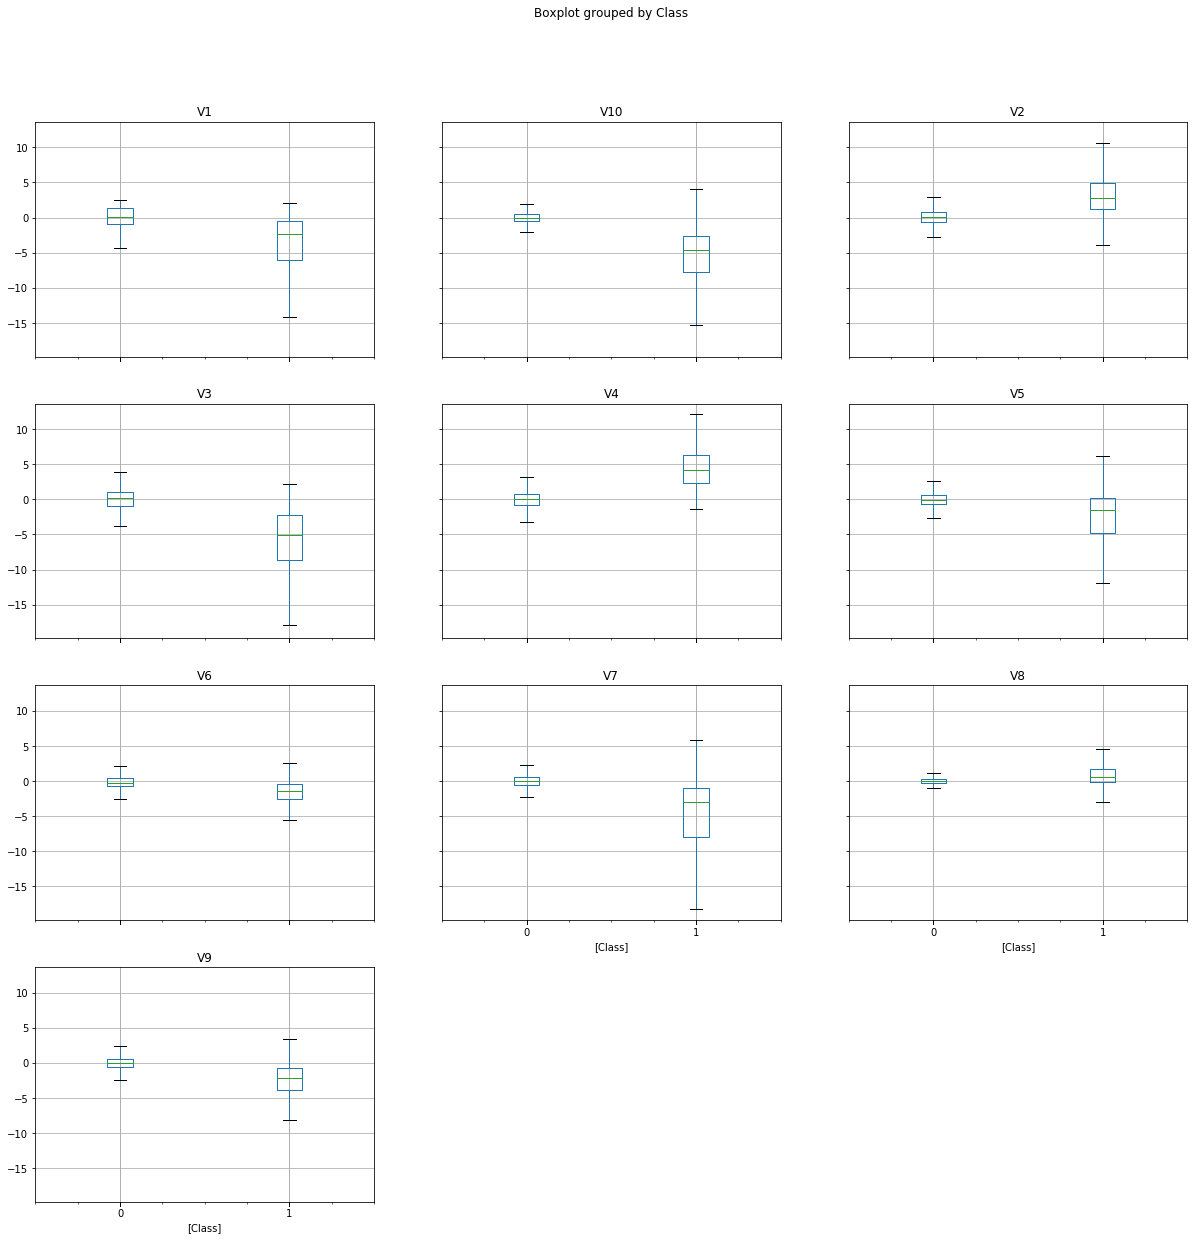

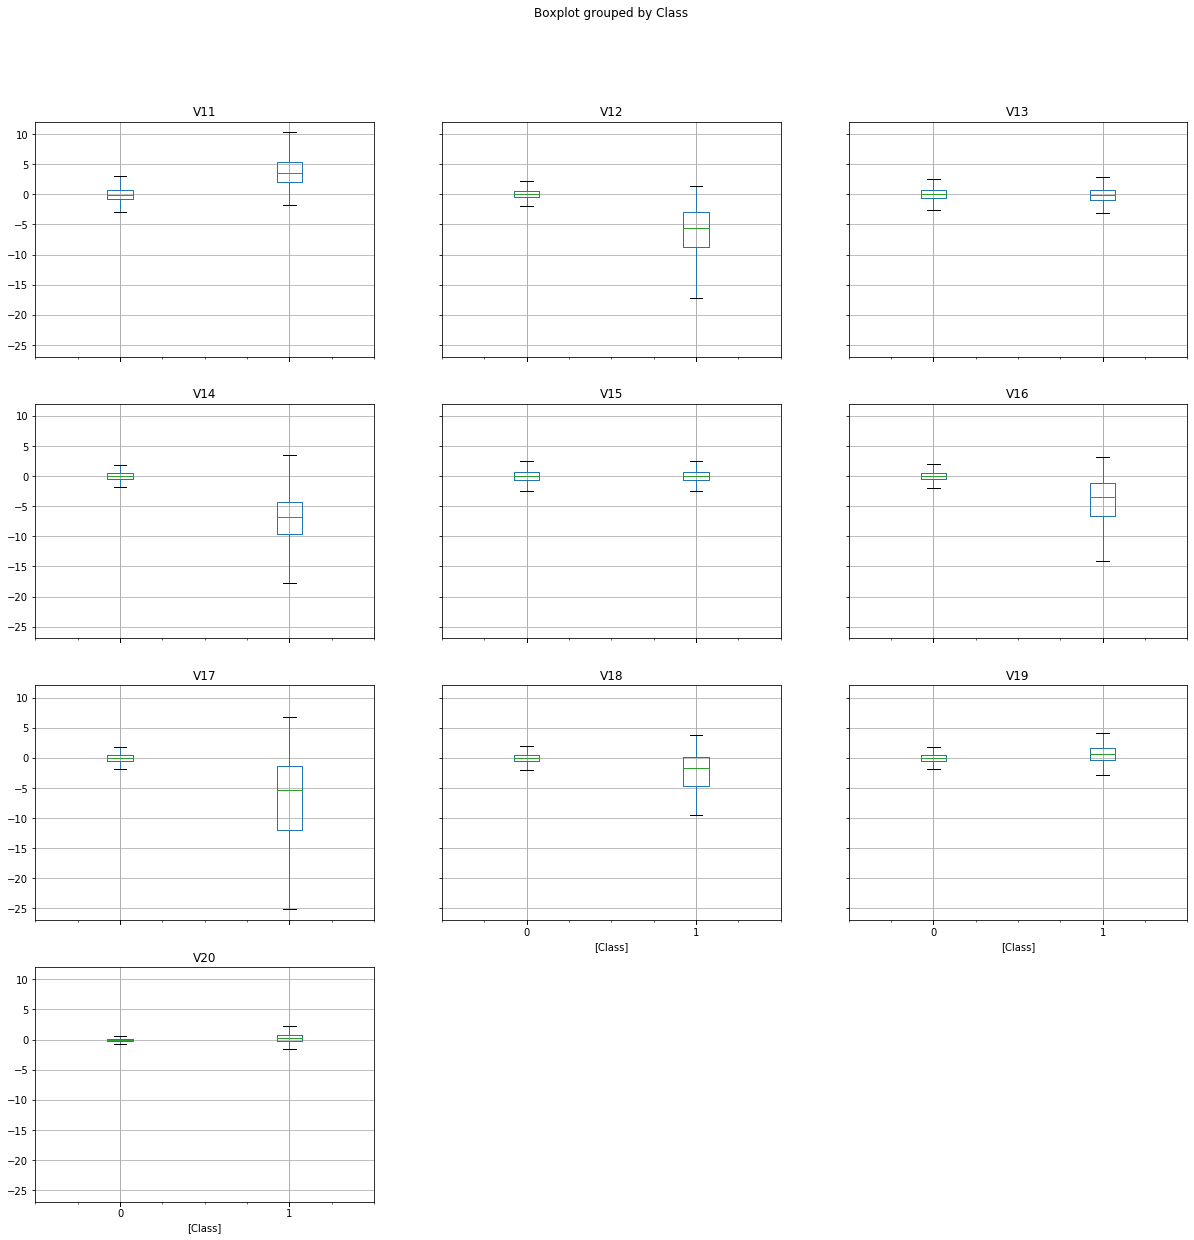

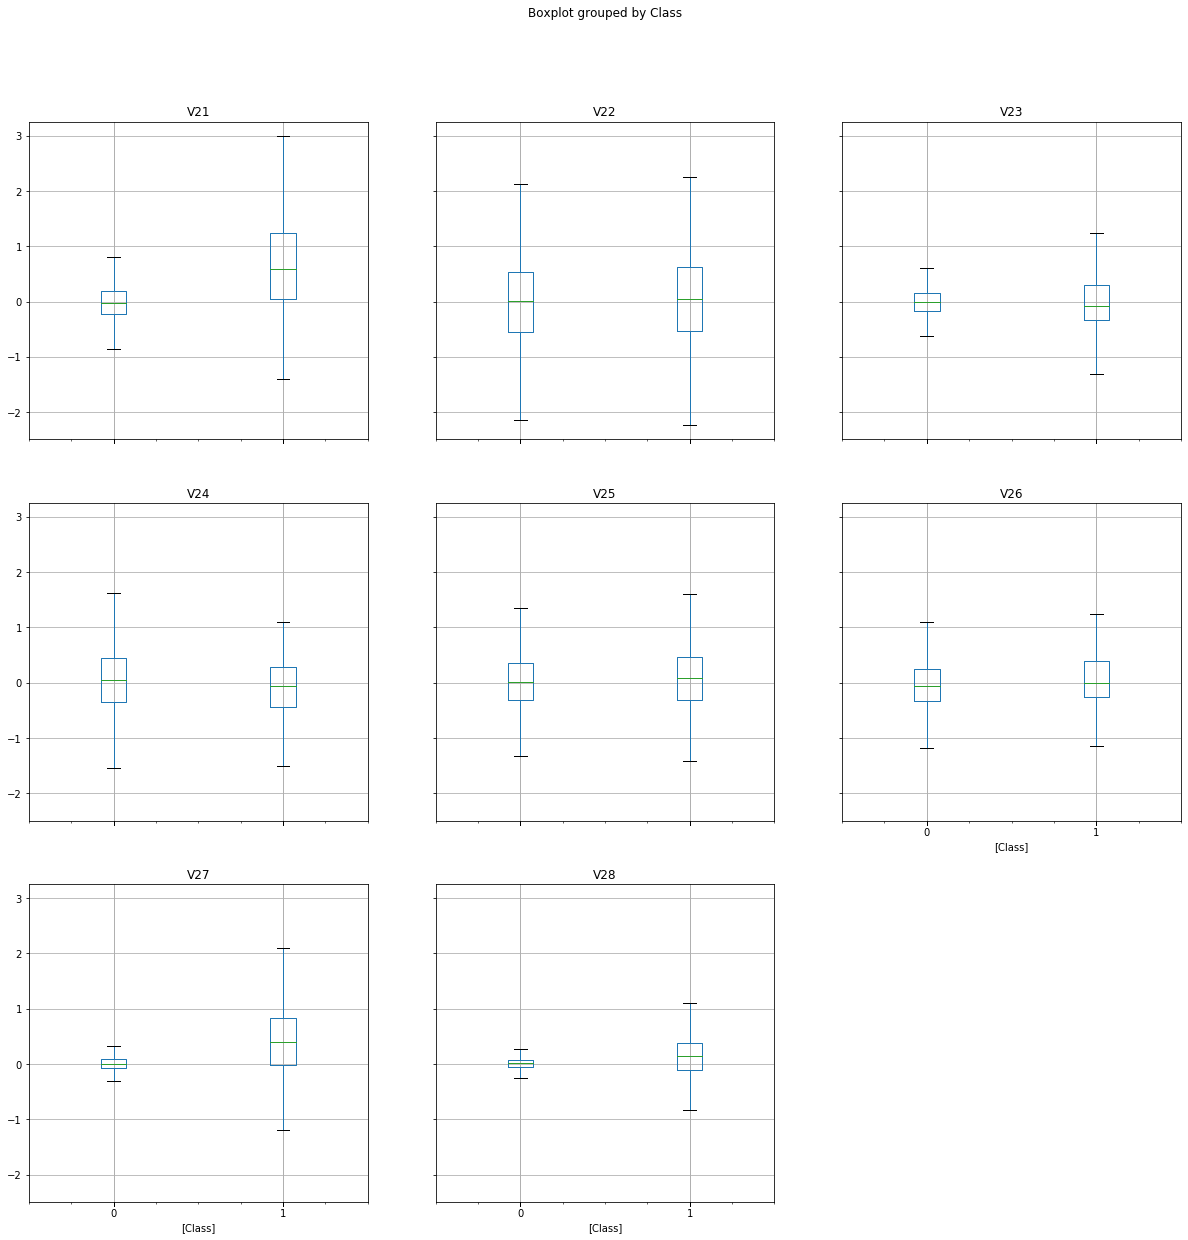

In [48]:
data_v1_v10.boxplot(by = 'Class', figsize = (20,20), showfliers=False)
data_v11_v20.boxplot(by = 'Class', figsize = (20,20), showfliers=False)
data_v21_v28.boxplot(by = 'Class', figsize = (20,20), showfliers=False)
plt.show()

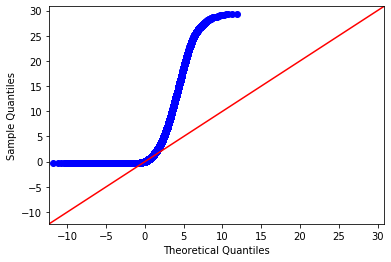

In [11]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import laplace
qqplot(datasetf['Amount'], fit=True, line = '45', dist= laplace)
plt.show()


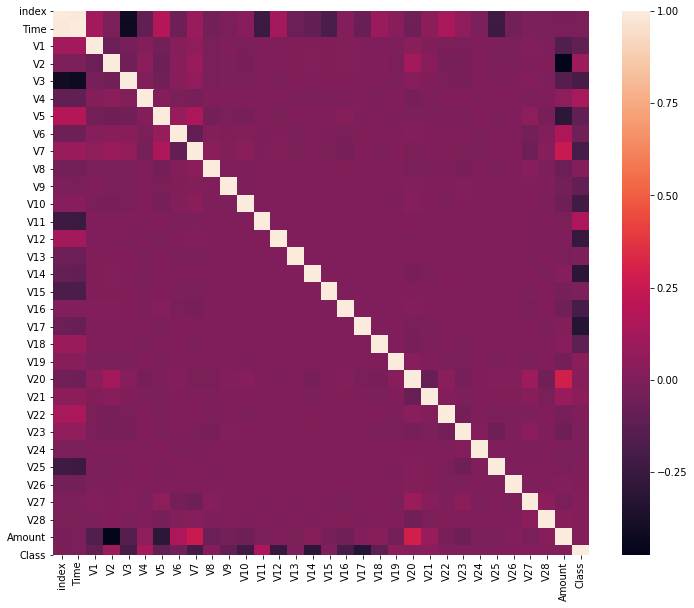

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(datasetf.corr())
plt.show()

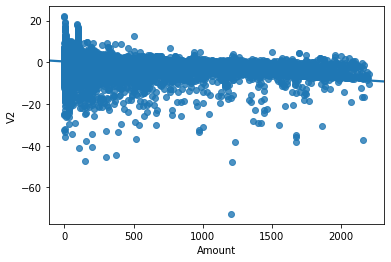

In [17]:
sns.regplot('Amount', 'V2', datasetf)
plt.show()

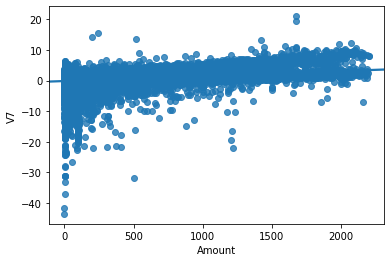

In [18]:
sns.regplot('Amount', 'V7', datasetf)
plt.show()

In [22]:
from statsmodels.formula.api import ols
model = ols("Class ~ V17", datasetf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 3.398e+04
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:06:57   Log-Likelihood:             5.1673e+05
No. Observations:              284238   AIC:                        -1.033e+06
Df Residuals:                  284236   BIC:                        -1.033e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017   7.37e-05     23.483      0.000       0.002       0.002
V17           -0.0160   8.68e-05   -184.343      0.000      -0.016      -0.016
==============================================================================
Omnibus:                   633020.381   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2959150514.652
Skew:                          21.161   Prob(JB):                         0.00
Kurtosis:                     501.065   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

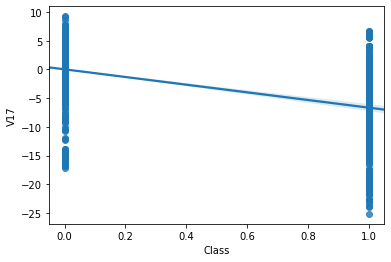

In [23]:
sns.regplot('Class', 'V17', datasetf)
plt.show()

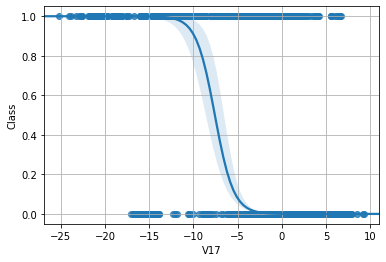

In [25]:
sns.regplot(datasetf['V17'], datasetf['Class'], logistic=True)
plt.grid()
plt.show()

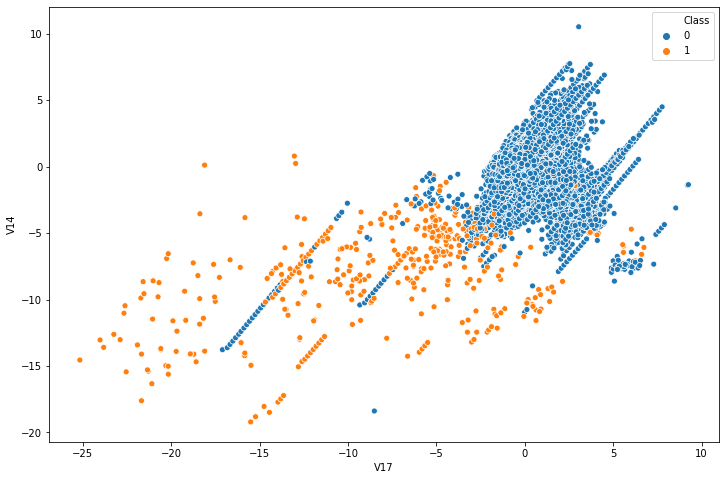

In [26]:
#v17, v14, v12, v10, v7
plt.figure(figsize=(12,8))
sns.scatterplot('V17', 'V14', data=datasetf, hue = 'Class')
plt.show()

In [34]:
from statsmodels.formula.api import logit
modelTop = logit('Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28', datasetf).fit()
modelTop.summary()

Optimization terminated successfully.
         Current function value: 0.003933
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284238
Model:                          Logit   Df Residuals:                   284209
Method:                           MLE   Df Model:                           28
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.6912
Time:                        16:55:57   Log-Likelihood:                -1117.8
converged:                       True   LL-Null:                       -3620.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6134      0.145    -59.416      0.000      -8.898      -8.329
V1             0.0345      0.041      0.849      0.396      -0.045       0.114
V2            -0.0644      0.050     -1.280      0.201      -0.163       0.034
V3             0.0044      0.044      0.099      0.921      -0.083       0.092
V4             0.7144      0.074      9.680      0.000       0.570       0.859
V5             0.0147      0.063      0.232      0.817      -0.109       0.139
V6            -0.0712      0.077     -0.930      0.352      -0.221       0.079
V7             0.0379      0.062      0.612      0.541      -0.084       0.160
V8            -0.1996      0.029     -6.799      0.000      -0.257      -0.142
V9            -0.2309      0.113     -2.049      0.040      -0.452      -0.010
V10           -0.7948      0.104     -7.652      0.000      -0.998      -0.591
V11           -0.0032      0.076     -0.042      0.966      -0.153       0.146
V12            0.0379      0.086      0.441      0.659      -0.131       0.207
V13           -0.3188      0.081     -3.935      0.000      -0.478      -0.160
V14           -0.5436      0.064     -8.557      0.000      -0.668      -0.419
V15           -0.0878      0.084     -1.042      0.298      -0.253       0.077
V16           -0.2226      0.124     -1.802      0.072      -0.465       0.020
V17           -0.0073      0.069     -0.105      0.916      -0.143       0.129
V18            0.0154      0.127      0.121      0.903      -0.233       0.264
V19            0.0318      0.096      0.332      0.740      -0.156       0.220
V20           -0.1931      0.088     -2.197      0.028      -0.365      -0.021
V21            0.4134      0.060      6.859      0.000       0.295       0.532
V22            0.5464      0.129      4.222      0.000       0.293       0.800
V23           -0.0851      0.077     -1.102      0.270      -0.236       0.066
V24            0.1569      0.150      1.043      0.297      -0.138       0.452
V25           -0.0609      0.132     -0.462      0.644      -0.319       0.197
V26           -0.0198      0.191     -0.103      0.918      -0.395       0.355
V27           -0.6389      0.157     -4.082      0.000      -0.946      -0.332
V28           -0.2206      0.113     -1.958      0.050      -0.441       0.000
==============================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [6]:
from statsmodels.formula.api import logit
modelTop = logit('Class ~ V4 + V8 + V9 + V10 + V13 + V14 + V20 + V21 + V22 + V27 + V28', datasetf).fit()
modelTop.summary()

Optimization terminated successfully.
         Current function value: 0.003992
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284238
Model:                          Logit   Df Residuals:                   284226
Method:                           MLE   Df Model:                           11
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                  0.6866
Time:                        10:14:34   Log-Likelihood:                -1134.6
converged:                       True   LL-Null:                       -3620.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6623      0.130    -66.705      0.000      -8.917      -8.408
V4             0.6941      0.051     13.644      0.000       0.594       0.794
V8            -0.1649      0.016    -10.409      0.000      -0.196      -0.134
V9            -0.0950      0.080     -1.188      0.235      -0.252       0.062
V10           -0.7735      0.057    -13.497      0.000      -0.886      -0.661
V13           -0.3057      0.076     -4.003      0.000      -0.455      -0.156
V14           -0.5751      0.041    -14.101      0.000      -0.655      -0.495
V20           -0.2047      0.060     -3.415      0.001      -0.322      -0.087
V21            0.4582      0.044     10.453      0.000       0.372       0.544
V22            0.7596      0.107      7.098      0.000       0.550       0.969
V27           -0.5826      0.105     -5.527      0.000      -0.789      -0.376
V28           -0.2739      0.094     -2.902      0.004      -0.459      -0.089
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
import numpy as np
np.exp(modelTop.params)

Intercept    0.000173
V4           2.001812
V8           0.847950
V9           0.909405
V10          0.461395
V13          0.736584
V14          0.562637
V20          0.814914
V21          1.581260
V22          2.137500
V27          0.558459
V28          0.760397
dtype: float64

In [3]:
data_ril = datasetf.filter(['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V20', 'V21', 'V22', 'V27', 'V28', 'Class'])

In [4]:
from sklearn.model_selection import train_test_split
data_train , data_test = train_test_split(data_ril, test_size = 0.15)
print(len(data_train))
print(len(data_test))

241602
42636


In [7]:
test_probs = modelTop.predict(data_test.dropna())
test_probs_int = test_probs.round().astype(int)
test_probs_int.head()

203151    0
258154    0
159850    0
261014    0
204978    0
dtype: int32

In [8]:
test_vero = data_test.dropna()['Class']
test_vero.head()

203151    0
258154    0
159850    0
261014    0
204978    0
Name: Class, dtype: int64

In [9]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_vero, test_probs_int).ravel()
print("Numero di True Negative: ", tn)
print("Numero di False Positive: ", fp)
print("Numero di False Negative: ", fn)
print("Numero di True Positive: ", tp)

Numero di True Negative:  42570
Numero di False Positive:  8
Numero di False Negative:  24
Numero di True Positive:  34


In [10]:
cm = confusion_matrix(test_vero, test_probs_int)
cm = cm/cm.sum(1).reshape(-1,1)
tnr, fpr, fnr, tpr = cm.ravel()
print("True Negative Rate: ", tnr)
print("False Positive Rate: ", fpr)
print("False Negative Rate: ", fnr)
print("True Positive Rate: ", tpr)

True Negative Rate:  0.9998121095401381
False Positive Rate:  0.0001878904598619005
False Negative Rate:  0.41379310344827586
True Positive Rate:  0.5862068965517241


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(test_vero, test_probs_int)
reacall = recall_score(test_vero, test_probs_int)
f1 = f1_score(test_vero, test_probs_int)
accuracy = accuracy_score(test_vero, test_probs_int)
print("Precision: ", tnr)
print("Recall: ", fpr)
print("f1: ", f1)
print("Accuracy: ", accuracy)

Precision:  0.9998121095401381
Recall:  0.0001878904598619005
f1:  0.68
Accuracy:  0.9992494605497702


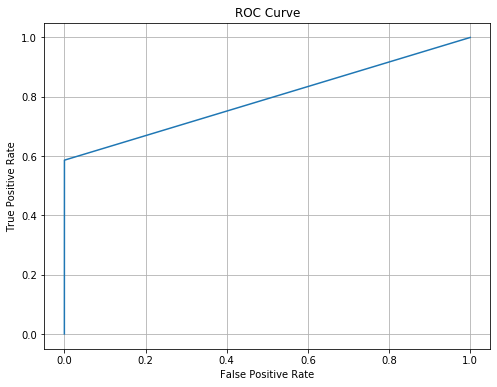

In [12]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds = roc_curve(test_vero, test_probs_int)
plt.figure(figsize=(8,6))
plt.plot(fpr2,tpr2)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [106]:
 from scipy.stats import norm
#la notazione sotto è una notazione compatta #per definire una distribuzione normale e fittarla sui dati
#costruiamo due distribuzioni normali separate per i due set di dati
temp = 'V24' #V24 V26
g_0 = norm(*norm.fit(datasetf[datasetf['Class']==0][temp])) 
g_1 = norm(*norm.fit(datasetf[datasetf['Class']==1][temp]))
prob_0 = g_0.pdf(datasetf[temp]) 
prob_1 = g_1.pdf(datasetf[temp])
pred_fraud = prob_1 >= prob_0
from sklearn.metrics import confusion_matrix, accuracy_score 
genuine_gt = datasetf['Class']==0
acc = accuracy_score(genuine_gt, pred_fraud) 
cm = confusion_matrix(genuine_gt, pred_fraud) 

cm=cm/cm.sum(1).reshape(-1,1) 
_, fpr, _, tpr = cm.ravel() 
print("False Positive Rate: {:0.2f}".format(fpr)) 
print("True Positive Rate: {:0.2f}".format(tpr)) 
print("Accuracy: {:0.2f}".format(acc))

False Positive Rate: 0.67
True Positive Rate: 0.57
Accuracy: 0.57


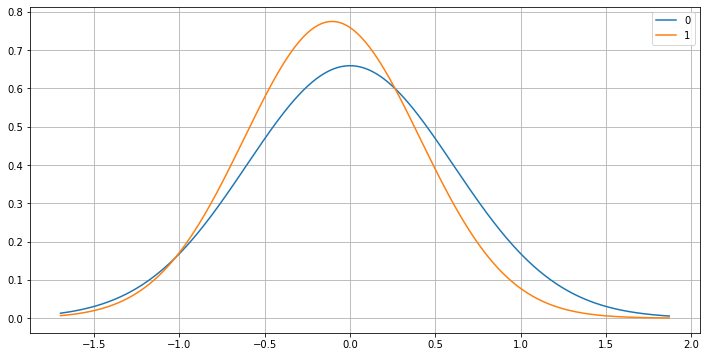

In [107]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(g_1.ppf(0.001), g_0.ppf(0.999),1000) #g1 = gf
plt.figure(figsize=(12,6)) 
plt.plot(x,g_0.pdf(x)) 
plt.plot(x,g_1.pdf(x)) 
plt.legend(['0','1']) 
plt.grid() 
plt.show()


In [108]:
prob_0 = g_0.pdf(datasetf[temp]) 
prob_1 = g_1.pdf(datasetf[temp])
pred_fraud = prob_1 >= prob_0
from sklearn.metrics import confusion_matrix, accuracy_score 
genuine_gt = datasetf['Class']==0
acc = accuracy_score(genuine_gt, pred_fraud) 
cm = confusion_matrix(genuine_gt, pred_fraud) 

cm=cm/cm.sum(1).reshape(-1,1) 
_, fpr, _, tpr = cm.ravel() 
print("False Positive Rate: {:0.2f}".format(fpr)) 
print("True Positive Rate: {:0.2f}".format(tpr)) 
print("Accuracy: {:0.2f}".format(acc))

False Positive Rate: 0.67
True Positive Rate: 0.57
Accuracy: 0.57


[-1.02515189  0.26373294]


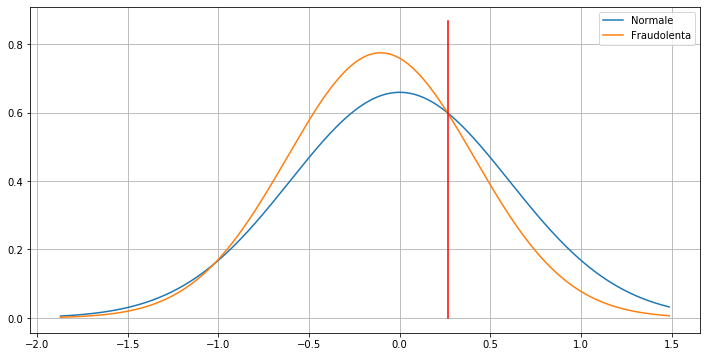

In [109]:
def risolvi(mu_1,mu_2,sigma_1,sigma_2): 
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2) 
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2) 
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1) 
    return np.roots([a,b,c])

solutions = risolvi(g_1.mean(),g_0.mean(),g_1.std(), g_0.std()) 
print(solutions)

x = np.linspace(g_0.ppf(0.001), g_1.ppf(0.999),1000)
plt.figure(figsize=(12,6)) 
plt.plot(x,g_0.pdf(x)) 
plt.plot(x,g_1.pdf(x)) 
plt.legend(['Normale','Fraudolenta']) 
plt.plot([solutions[1],solutions[1]],[0,0.866],'r') 
plt.grid() 
plt.show()


In [11]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
#passiamo priors=[0.5, 0.5] per assumere probabilità a priori uniformi 
modelG = GaussianNB(priors=[0.5,0.5]) #effettuiamo il fit del modello mediante il metodo fit 
modelG.fit(datasetf[['V24','V26']],datasetf['Class'])
modelG.score(datasetf[['V24','V26']],datasetf['Class'])

0.46601791456455505

In [9]:
modelN = GaussianNB(priors=[0.5,0.5])
modelN.fit(datasetf[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']],datasetf['Class'])
modelN.score(datasetf[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']],datasetf['Class'])

0.9913628719594143

In [17]:
arrayColonne = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
arrayRis = []
for i in arrayColonne:
    modelG = GaussianNB(priors=[0.5,0.5]) #effettuiamo il fit del modello mediante il metodo fit 
    modelG.fit(datasetf[[i]],datasetf['Class'])
    scor = modelG.score(datasetf[[i]],datasetf['Class'])
    arrayRis.append(scor)
    print(i + ": ",scor)
arrayRis.sort()
print(arrayRis)

Time:  0.4901209549743525
V1:  0.9553191339651982
V2:  0.9507419838304519
V3:  0.9664436141543354
V4:  0.9358424981881381
V5:  0.9484164678895854
V6:  0.8651587753924528
V7:  0.9711685277830551
V8:  0.9674568495415814
V9:  0.9102231228758998
V10:  0.9743841428661896
V11:  0.9508862291459974
V12:  0.9462000154799851
V13:  0.718091880747824
V14:  0.9697577382334522
V15:  0.7401578958478459
V16:  0.9507525383657358
V17:  0.9781767392115058
V18:  0.922863937967478
V19:  0.8530773506709166
V20:  0.9328977828439547
V21:  0.9728255898226135
V22:  0.8562753748619115
V23:  0.9604908562542658
V24:  0.4270646430104349
V25:  0.8175543030840352
V26:  0.48922030129680055
V27:  0.9537253991373427
V28:  0.9509143745734209
[0.4270646430104349, 0.48922030129680055, 0.4901209549743525, 0.718091880747824, 0.7401578958478459, 0.8175543030840352, 0.8530773506709166, 0.8562753748619115, 0.8651587753924528, 0.9102231228758998, 0.922863937967478, 0.9328977828439547, 0.9358424981881381, 0.9462000154799851, 0.94

In [12]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(datasetf['V17',datasetf['Class']==0],datasetf['V10',datasetf['Class']==0],'o')
    plt.legend(['Normale','Fraudolenta'])
    plt.xlabel("V17")
    plt.ylabel("V10")
plt.grid()
plt.show()


TypeError: '('V17', 0         True
1         True
2         True
3         True
4         True
          ... 
284233    True
284234    True
284235    True
284236    True
284237    True
Name: Class, Length: 284238, dtype: bool)' is an invalid key

<Figure size 864x576 with 0 Axes>

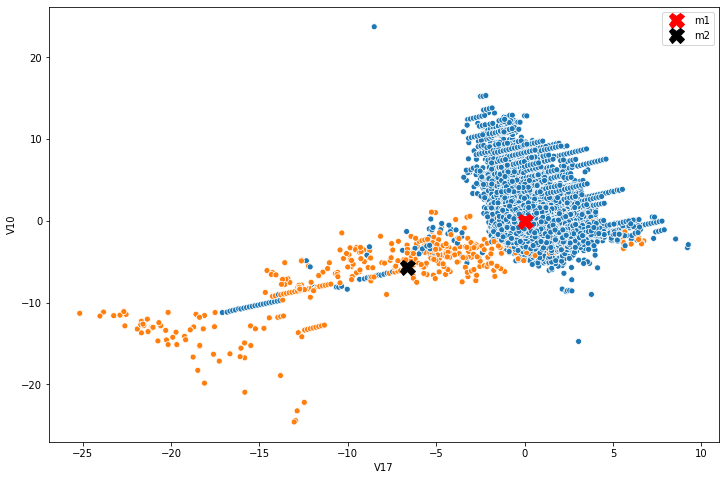

In [27]:
import seaborn as sns

genuinef = datasetf[datasetf['Class'] == 0].reset_index()
fraudolentf = datasetf[datasetf['Class'] == 1].reset_index()

plt.figure(figsize=(12,8))
sns.scatterplot('V17', 'V10', data=datasetf, hue = 'Class')
plt.plot(genuinef['V17'].mean(),genuinef['V10'].mean(),'Xk',markersize=15,color="red")
plt.plot(fraudolentf['V17'].mean(),fraudolentf['V10'].mean(),'Xk',markersize=15)
plt.legend(['m1','m2']) 
#plt.plot(m2[0],m2[1],'Xr',markersize=15) 
plt.show()

In [70]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA() 
lda.fit(datasetf.drop('Class',axis=1),datasetf.Class) 
datasetf_lda=lda.transform(datasetf.drop('Class',axis=1))
print(datasetf_lda.shape)

(284238, 1)


C:\Users\ds97\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


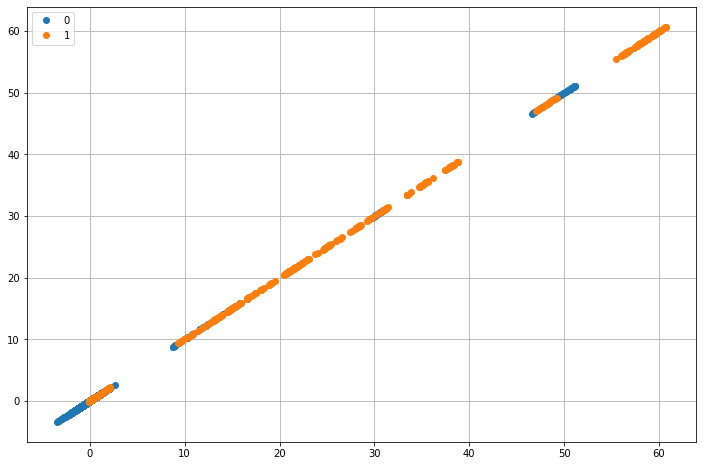

In [71]:
plt.figure(figsize=(12,8)) #otteniamo le tre classi uniche dal dataset 
classes = np.unique(datasetf['Class']) 
for s in classes: 
    class_data = datasetf_lda[datasetf['Class']==s]
    plt.plot(class_data[:,0],class_data[:,0],'o')    
plt.grid() 
plt.legend(classes)
plt.show()


In [78]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(datasetf_lda,datasetf.Class) 
print("Accuracy: %0.2f" % model.score(datasetf_lda,datasetf.Class))

Accuracy: 1.00


In [83]:
preds=lda.predict(datasetf.drop('Class',axis=1))

In [2]:
import pandas as pd #eliminiamo la classe virginica 
df = pd.DataFrame()
df['X'] = datasetf['V17'] 
df['Y'] = datasetf['V10'] 
df['C'] = datasetf['Class']
df.head()

,X,Y,C
0,0.207971,0.090794,0
1,-0.114805,-0.166974,0
2,1.109969,0.207643,0
3,-0.684093,-0.054952,0
4,-0.237033,0.753074,0


C:\Users\ds97\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


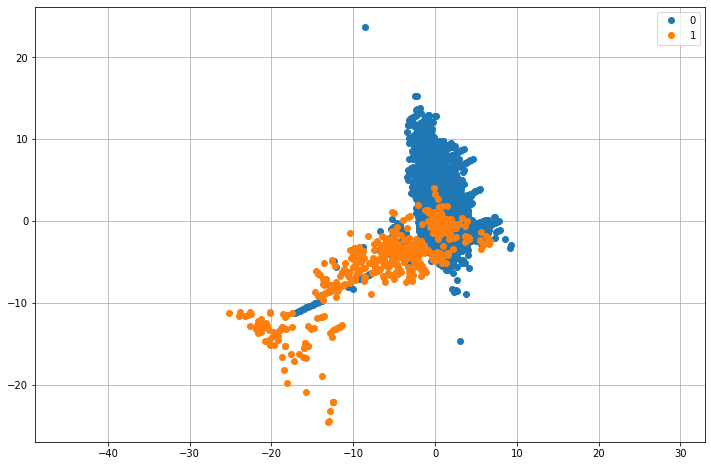

In [3]:
from matplotlib import pyplot as plt
def plot2d(di):
    classes = di['C'].unique()
    for c in classes:
        plt.plot(di.where(di['C']==c).dropna()['X'].values,di.where(di['C']==c).dropna()['Y'].values,'o', label=c)
    plt.axis('equal')
    plt.grid()
plt.figure(figsize=(12,8))
plot2d(df)
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
#costruiamo il classificatore specificando un kernel lineare
#In questa fase impostiamo un parametro C alto in modo da penalizzare
#molto le variabili slack e ottenere un hard margin classico
svm = SVC(kernel='linear',C=100)
#allenaimo il modello
svm.fit(df.drop(['C'], axis=1), df['C'])

In [2]:
import numpy as np
np.random.seed(1346)
mask = np.random.rand(len(data)) < 0.9
train = data[mask]
test = data[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256084, 31)
Test Shape: (28723, 31)


In [3]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]
selected = non_fraud.sample(no_of_frauds)
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

There are 457 fraudulent transactions in the train data.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,66037.0,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,-1.547882,...,0.352456,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,7.53,1
1,159516.0,-0.566748,1.427939,-1.530618,-1.628021,1.834644,-0.373387,1.544093,-0.213749,-0.202456,...,0.188767,0.796144,-0.318799,-0.304300,-0.093587,0.099001,0.461148,0.390840,7.70,0
2,135095.0,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,...,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00,1
3,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
4,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
5,101597.0,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,...,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,147.87,1
6,26560.0,-0.740712,0.721258,1.174974,-1.836492,0.795460,0.504383,0.592821,0.124015,0.179007,...,-0.176346,-0.221780,-0.248107,-1.316607,-0.244660,0.792423,0.209132,-0.010564,5.76,0
7,982.0,-3.555683,2.365464,-0.097574,-2.033547,-0.628283,-0.265773,0.409518,0.361232,2.441428,...,-0.580859,-0.357434,0.179283,-0.330568,0.303838,0.768353,0.969317,0.518012,38.44,0
8,117771.0,-0.828664,-0.772487,2.951565,-1.116988,-1.164826,1.061662,-1.029984,0.550853,0.592065,...,-0.313697,-0.145941,-0.341658,-0.631186,0.381491,0.906575,0.067848,0.065579,40.00,0
9,74130.0,-2.152268,-0.939637,0.852868,-0.236494,3.413200,-1.996596,-0.087201,-0.071993,-0.738699,...,0.021024,-0.489501,-0.162631,-0.623038,0.775754,0.239671,-0.267386,-0.116301,0.76,0


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

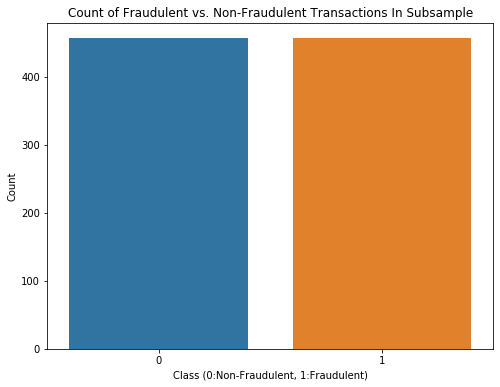

In [4]:
import seaborn as sns
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [5]:
from sklearn.svm import SVC
import pandas as pd
df = pd.DataFrame()
df['X'] = subsample['V17'] 
df['Y'] = subsample['V10'] 
df['C'] = subsample['Class']
df.head()
#costruiamo il classificatore specificando un kernel lineare
#In questa fase impostiamo un parametro C alto in modo da penalizzare
#molto le variabili slack e ottenere un hard margin classico
svm = SVC(kernel='linear',C=100)
#allenaimo il modello
svm.fit(df.drop(['C'], axis=1), df['C'])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
print("Accuracy sul training set: %0.2f" % svm.score(df.drop(['C'], axis=1), df.C))

Accuracy sul training set: 0.88


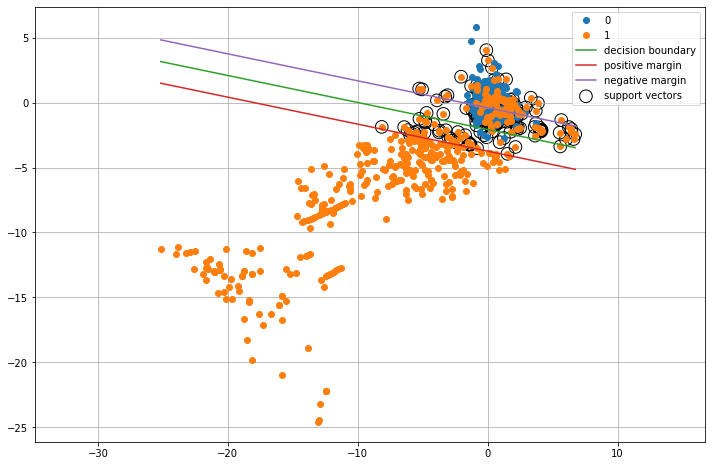

In [23]:
from matplotlib import pyplot as plt
def plot2d(di):
    classes = di['C'].unique()
    for c in classes:
        plt.plot(di.where(di['C']==c).dropna()['X'].values,di.where(di['C']==c).dropna()['Y'].values,'o', label=c)
    plt.axis('equal')
    plt.grid()

def project(x,w,b):
    return -w[0]/w[1]*x-b/w[1]

def plot2dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_
    plot2d(data)
    plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], 160,
    facecolors='none',edgecolors='k', label='support vectors')
    x=np.array([data.X.min(),data.X.max()])
    plt.plot(x,project(x,w,b), label='decision boundary')
    plt.plot(x,project(x,w,b-1), label='positive margin')
    plt.plot(x,project(x,w,b+1), label='negative margin')
    
plt.figure(figsize=(12,8))
plot2dall(df,svm)
plt.legend()
plt.show()

In [6]:
df2 = pd.DataFrame()
df2['X'] = subsample['V17'] 
df2['Y'] = subsample['V10']
df2['Z'] = subsample['V4']
df2['C'] = subsample['Class']

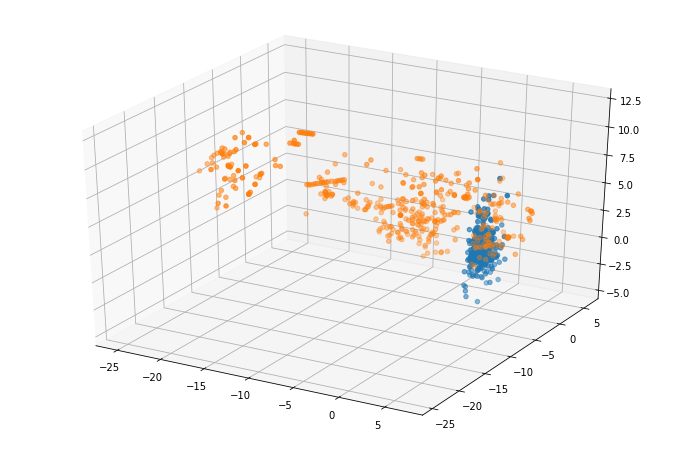

In [75]:
def plot3d(i):
    classes = i['C'].unique()
    for c in classes:
        X = i.where(i['C']==c)['X'].values
        Y = i.where(i['C']==c)['Y'].values
        Z = i.where(i['C']==c)['Z'].values
        plt.gca().scatter(X,Y,Z,label=c)
    #plt.axis('equal')
    plt.grid()
    
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
plot3d(df2)
plt.show()

In [76]:
svm = SVC(kernel='linear')
svm.fit(df2.drop(['C'],axis=1),df2['C'])
print("Accuracy di training: %0.2f" % svm.score(df2.drop(['C'],axis=1),df2['C']))

Accuracy di training: 0.93


In [74]:
svm2 = SVC(kernel='linear')
svm2.fit(subsample.drop(['Class'],axis=1),subsample['Class'])
print("Accuracy di training: %0.2f" % svm2.score(subsample.drop(['Class'],axis=1),subsample['Class']))

Accuracy di training: 0.90


In [81]:
%matplotlib inline

def project3d(x,y,w,b):
    return -w[0]/w[2]*x -w[1]/w[2]*y - b/w[2]

def plot3dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_
    plot3d(data)
    plt.gca().scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1],svm.support_vectors_[:,2],s=160,facecolors='none',edgecolors='k', label='support vectors')
    
    x,y = np.meshgrid(np.linspace(data.X.min(),data.X.max(),10),np.linspace(data.Y.min(),data.Y.max(),10))

    z1 = project3d(x,y,w,b+1)
    z2 = project3d(x,y,w,b)
    z3 = project3d(x,y,w,b-1)
    plt.gca().plot_wireframe(x,y,z1,label='negative margin', color='r')
    plt.gca().plot_wireframe(x,y,z2,label='decision boundary', color='g')
    plt.gca().plot_wireframe(x,y,z3,label='positive margin',color='m')
    
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
plot3dall(df2,svm)
plt.legend()
ax.view_init(azim=0, elev=5)
plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (0,4) and requested shape (167,4)

<Figure size 1152x1152 with 1 Axes>

In [9]:
svm = SVC(kernel='rbf', gamma=0.0001)
svm.fit(df2.drop(['C'],axis=1),df2.C)
print("Accuracy su training set: %0.2f" % svm.score(df2.drop(['C'],axis=1),df2.C))

Accuracy su training set: 0.88


In [7]:
dfTest = pd.DataFrame()
dfTest['X'] = test['V17'] 
dfTest['Y'] = test['V10']
dfTest['Z'] = test['V4']
dfTest['C'] = test['Class']
dfTest.head()

,X,Y,Z,C
0,0.207971,0.090794,1.378155,0
1,0.002821,-0.099254,1.202613,0
2,0.092428,-0.230873,3.710061,0
3,0.757231,0.032674,1.802127,0
4,-0.079208,0.493931,-0.330070,0


In [47]:
svm = SVC(kernel='linear')
svm.fit(df2.drop(['C'],axis=1),df2['C'])
print("Accuracy di training: %0.2f" % svm.score(df2.drop(['C'],axis=1),df2['C']))
print("Accuracy di testing: %0.2f" % svm.score(dfTest.drop(['C'],axis=1),dfTest['C']))

Accuracy di training: 0.93
Accuracy di testing: 0.99


In [26]:
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(df2.drop(['C'],axis=1),df2['C'])
print("Accuracy di training: %0.2f" % svm.score(df2.drop(['C'],axis=1),df2['C']))
print("Accuracy di testing: %0.2f" % svm.score(dfTest.drop(['C'],axis=1),dfTest['C']))

Accuracy di training: 0.94
Accuracy di testing: 0.97


In [23]:
from sklearn.model_selection import GridSearchCV
#definiamo la griglia di parametri. Verranno provate tutte le combinazioni!
param_grid = [
{'C': [1, 10, 100], 'kernel': ['linear']}, #parametri da utilizzare con kernel lineare
{'C': [1, 10, 100], 'gamma': [0.01, 0.05, 0.001], 'kernel': ['rbf']} #parametri da utilizzare con kernel rbf
]
#definiamo l'oggetto Grid Search
#Passando l'argomento verbose, possiamo ottenere informazioni aggiuntive
#n_jobs permette di effettuare più test in parallelo
gs = GridSearchCV(SVC(), param_grid, verbose=1, n_jobs=2)
#avviamo la ricerca.
gs.fit(df2.drop(['C'],axis=1),df2['C'])

C:\Users\ds97\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=2,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.01, 0.05, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [24]:
print("Accuracy sul test set per il modello ottimizzato: %0.2f" % gs.score(dfTest.drop(['C'],axis=1),dfTest['C']))

Accuracy sul test set per il modello ottimizzato: 0.99


In [25]:
svm = gs.best_estimator_
print(svm)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [48]:
predizione = svm.predict(dfTest.drop(['C'],axis=1))

In [49]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(dfTest['C'], predizione).ravel()
print("Numero di True Negative: ", tn)
print("Numero di False Positive: ", fp)
print("Numero di False Negative: ", fn)
print("Numero di True Positive: ", tp)

Numero di True Negative:  27907
Numero di False Positive:  373
Numero di False Negative:  7
Numero di True Positive:  48


In [5]:
no_of_frauds = test.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))
#randomly selecting 442 random non-fraudulent transactions
non_fraud = test[test['Class'] == 0]
fraud = test[test['Class'] == 1]
selected = non_fraud.sample(no_of_frauds)
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsampleTest = pd.concat([selected, fraud])
len(subsampleTest)
#shuffling our data set
subsampleTest = subsampleTest.sample(frac=1).reset_index(drop=True)
subsampleTest.head(10)

There are 35 fraudulent transactions in the train data.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
1,75061.0,-0.255678,-0.128312,2.053699,0.991756,-1.058072,0.191349,0.390640,-0.268662,-1.271091,...,-0.080496,0.419274,0.143862,0.402034,-0.292620,-0.079102,0.034128,-0.044980,144.81,0
2,51112.0,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,...,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1
3,166042.0,2.308147,-1.342095,-1.884806,-1.801154,-0.409316,-0.220843,-0.770434,-0.207973,-1.743425,...,0.214003,1.118366,-0.164970,0.158194,0.451709,0.275022,-0.030347,-0.074900,37.50,0
4,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1
5,84875.0,-1.329905,0.864110,0.177223,-0.902612,1.291457,4.002512,-1.207749,1.972494,-0.153283,...,0.038467,-0.217288,-0.119543,1.036008,0.056579,0.301629,-0.283690,-0.036675,11.50,0
6,157729.0,2.053921,-0.485047,-0.421359,-0.567623,-0.788849,-0.850626,-0.576219,-0.177579,1.273687,...,0.178570,0.755375,0.185811,0.021986,-0.358174,0.905652,-0.042289,-0.054165,1.00,0
7,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90,1
8,8614.0,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,...,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1.00,1
9,118867.0,-0.074051,0.358921,1.018433,-0.360571,-0.706037,0.175344,-0.553373,-1.547362,0.730131,...,1.679605,-0.017511,-0.212456,1.194786,0.595726,0.598390,0.222597,0.241181,74.99,0


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

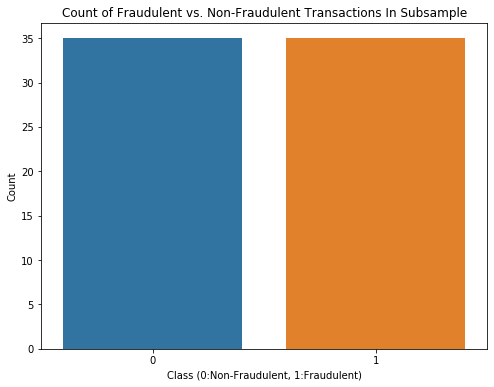

In [6]:
import seaborn as sns
new_counts = subsampleTest.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [7]:
dfTest = pd.DataFrame()
dfTest['X'] = subsampleTest['V17'] 
dfTest['Y'] = subsampleTest['V10']
dfTest['Z'] = subsampleTest['V4']
dfTest['C'] = subsampleTest['Class']
dfTest.head()

,X,Y,Z,C
0,1.733382,0.042228,4.173268,1
1,0.390565,0.777137,0.991756,0
2,-7.014622,-6.065782,4.273323,1
3,0.137881,1.795858,-1.801154,0
4,0.409736,-4.592390,5.809370,1


In [53]:
svm = SVC(kernel='linear')
svm.fit(df2.drop(['C'],axis=1),df2['C'])
print("Accuracy di training: %0.2f" % svm.score(df2.drop(['C'],axis=1),df2['C']))
print("Accuracy di testing: %0.2f" % svm.score(dfTest.drop(['C'],axis=1),dfTest['C']))

Accuracy di training: 0.93
Accuracy di testing: 0.93


In [54]:
predizione = svm.predict(dfTest.drop(['C'],axis=1))
tn, fp, fn, tp = confusion_matrix(dfTest['C'], predizione).ravel()
print("Numero di True Negative: ", tn)
print("Numero di False Positive: ", fp)
print("Numero di False Negative: ", fn)
print("Numero di True Positive: ", tp)

Numero di True Negative:  54
Numero di False Positive:  1
Numero di False Negative:  7
Numero di True Positive:  48


In [61]:
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(df2.drop(['C'],axis=1),df2['C'])
print("Accuracy di training: %0.2f" % svm.score(df2.drop(['C'],axis=1),df2['C']))
print("Accuracy di testing: %0.2f" % svm.score(dfTest.drop(['C'],axis=1),dfTest['C']))

Accuracy di training: 0.94
Accuracy di testing: 0.95


In [62]:
predizione = svm.predict(dfTest.drop(['C'],axis=1))
tn, fp, fn, tp = confusion_matrix(dfTest['C'], predizione).ravel()
print("Numero di True Negative: ", tn)
print("Numero di False Positive: ", fp)
print("Numero di False Negative: ", fn)
print("Numero di True Positive: ", tp)

Numero di True Negative:  54
Numero di False Positive:  1
Numero di False Negative:  5
Numero di True Positive:  50


In [14]:
from sklearn.tree import DecisionTreeClassifier
#limitiamo la profondità massima dell'albero per poterlo visualizzare in seguito
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(df2.drop('C',axis=1),df2['C'])
dt.score(dfTest.drop(['C'],axis=1),dfTest['C'])

0.9428571428571428

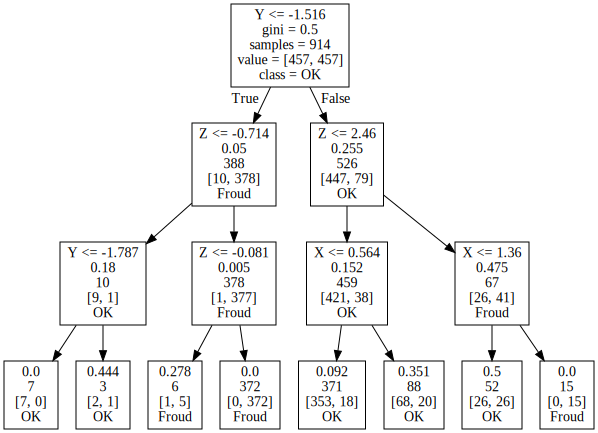

In [15]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=['X','Y','Z'],class_names=['OK', 'Froud'], rotate=False, label='root')
graph = graphviz.Source(dot_data)
graph

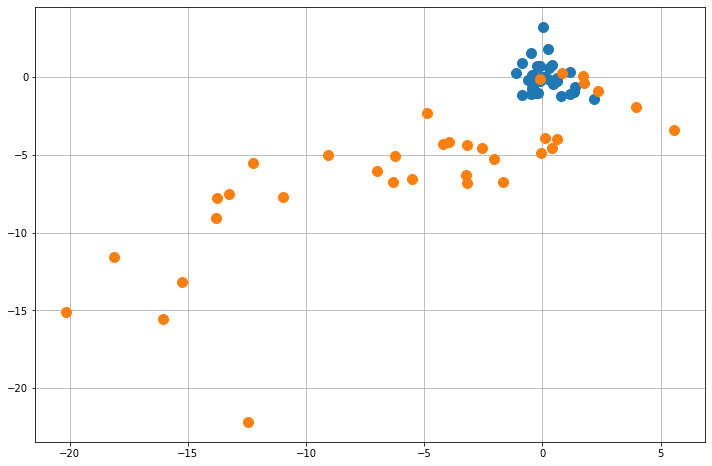

In [16]:
from matplotlib import pyplot as plt

def plot2d(data, label_suffix='', marker='o'):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data[data['C']==c].X.values,data[data['C']==c].Y.values, '.',label=c, marker=marker, markersize=10)
        
plt.figure(figsize=(12,8))
plot2d(dfTest)
plt.grid()

In [17]:
df2d = df2.drop(['Z'],axis=1)
dfTest2d = dfTest.drop(['Z'],axis=1)
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(df2d.drop('C',axis=1),df2d['C'])
dt2.score(dfTest2d.drop(['C'],axis=1),dfTest2d['C'])

0.9571428571428572

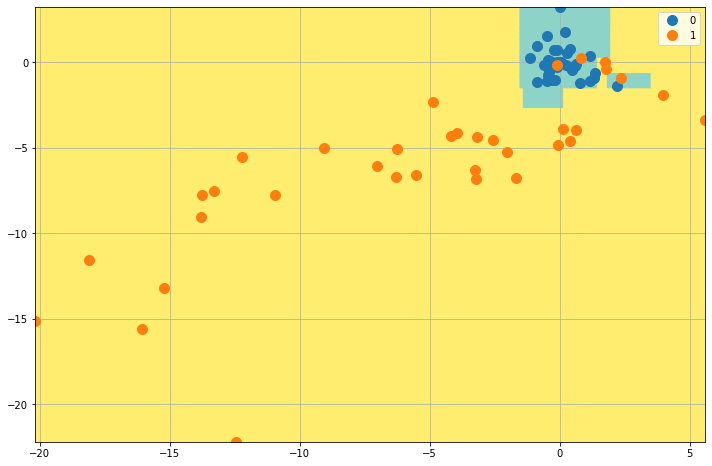

In [18]:
def plot_decision_tree_boundary(data, tree):
    #plottiamo i dati
    plot2d(data)
    #campioniamo 200 punti in maniera uniforme su entrambi gli assi
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)

    #costruiamo una griglia di coppie 2D di punti
    X,Y = np.meshgrid(X,Y)
    #classifichiamo tutti i punti
    Z = tree.predict(np.c_[X.ravel(), Y.ravel()])
    #recuperiamo i nomi delle classi e mettiamole in un dizionario
    class_dict = {c:i for i,c in enumerate(tree.classes_)}

    #trasformiamo gli id in classi
    Z=np.array(list(map(lambda x: class_dict[x],Z)))

    #modifichiamo la shape di Z per farla diventare una griglia
    Z = np.array(Z).reshape(X.shape)
    #utiliziamo pcolomesh per visualizzare le aree a falsi colori
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
plt.figure(figsize=(12,8))
plot_decision_tree_boundary(dfTest,dt2)
plt.grid()
plt.legend()
plt.show()

In [40]:
dt3 = DecisionTreeClassifier()
dt3.fit(subsample.drop('Class',axis=1),subsample['Class'])
dt3.score(subsampleTest.drop(['Class'],axis=1),subsampleTest['Class'])

0.9714285714285714

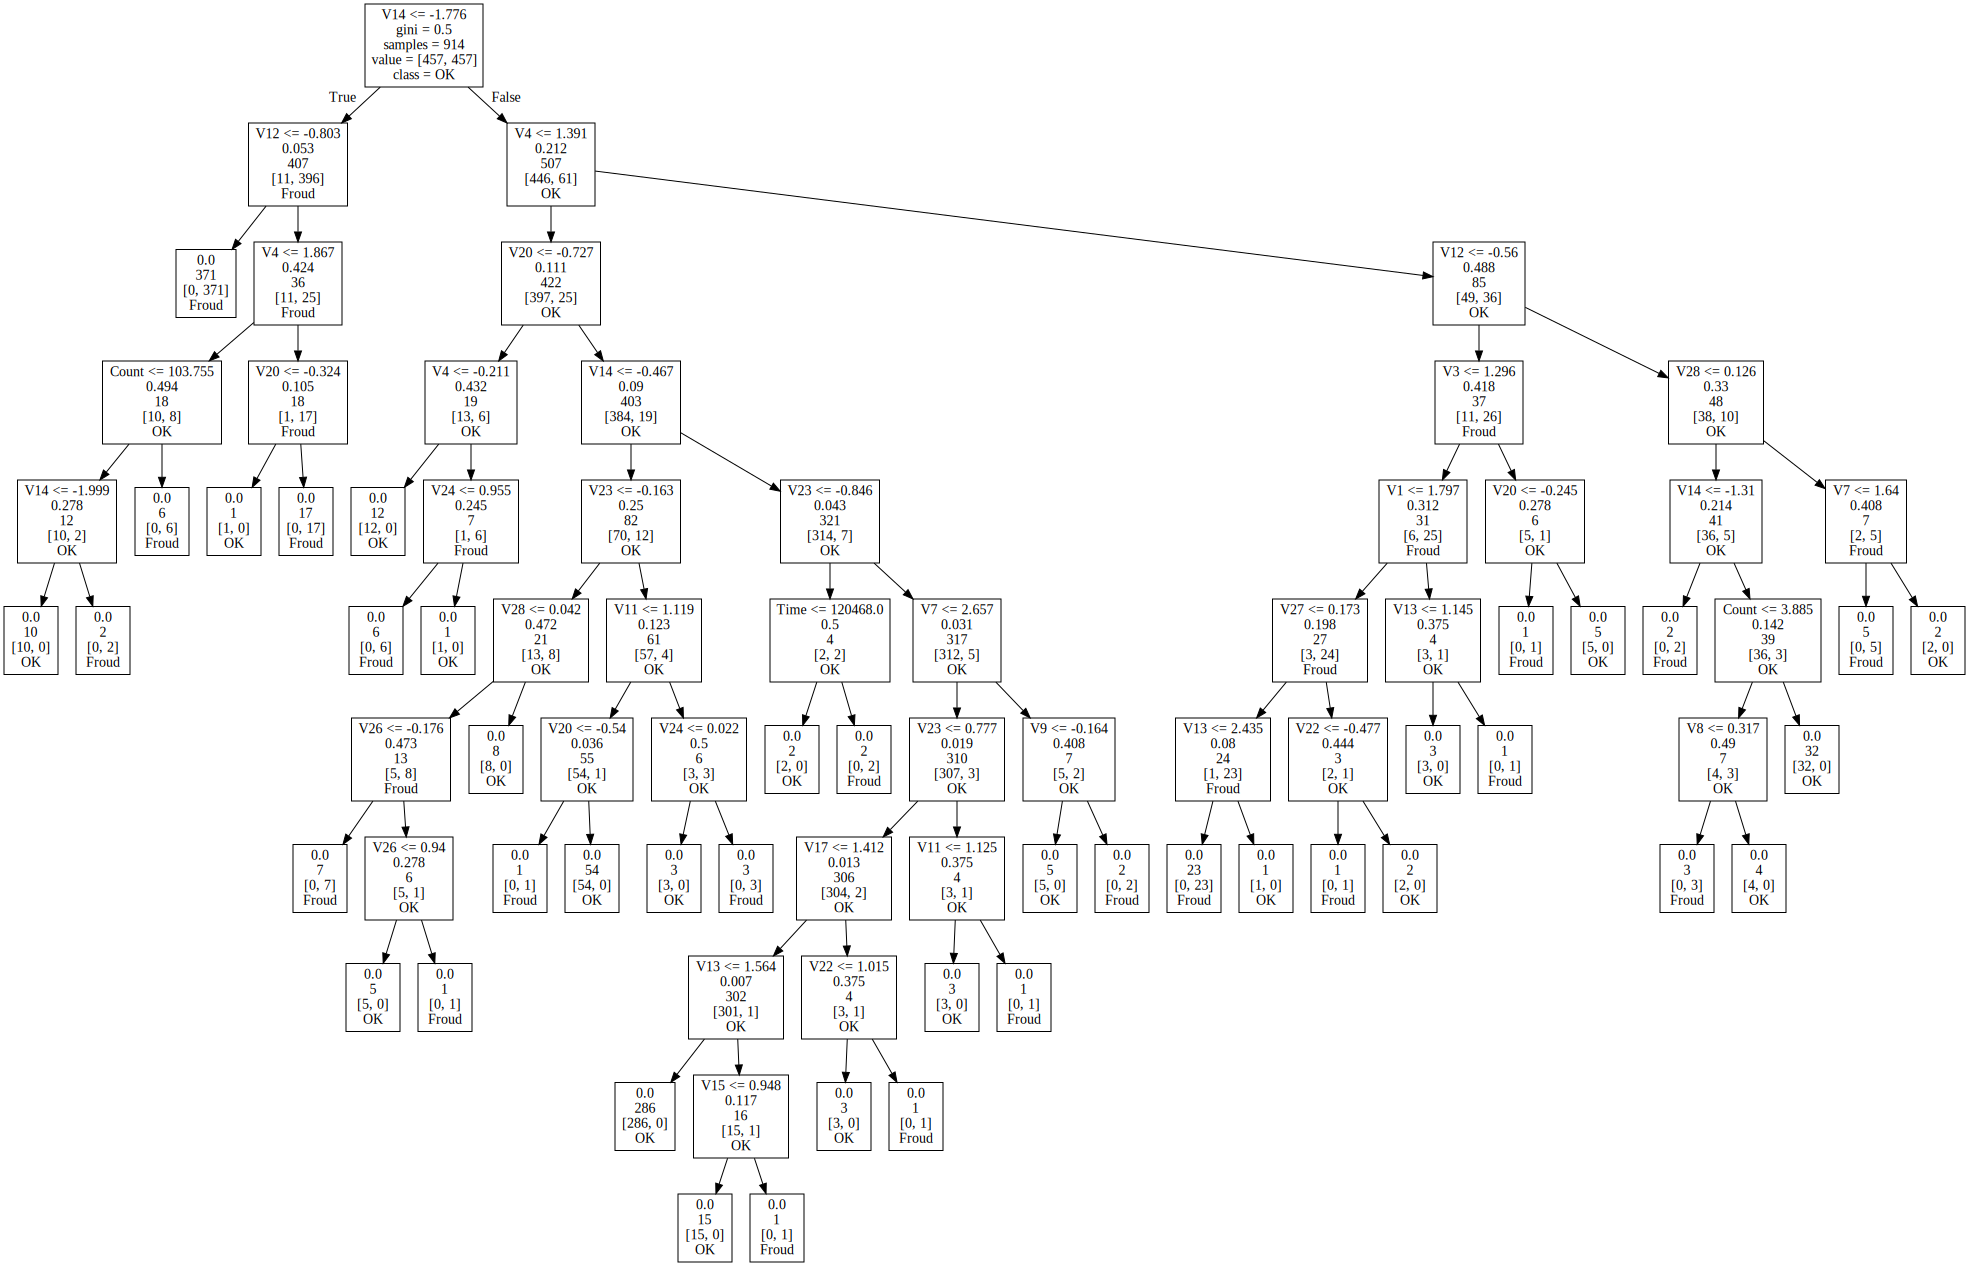

In [41]:
dot_data = tree.export_graphviz(dt3, out_file=None, feature_names=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Count'],class_names=['OK', 'Froud'], rotate=False, label='root')
graph = graphviz.Source(dot_data)
graph

In [45]:
from sklearn.metrics import confusion_matrix
predizione = dt3.predict(subsampleTest.drop('Class',axis=1))
tn, fp, fn, tp = confusion_matrix(subsampleTest['Class'], predizione).ravel()
print("Numero di True Negative: ", tn)
print("Numero di False Positive: ", fp)
print("Numero di False Negative: ", fn)
print("Numero di True Positive: ", tp)

Numero di True Negative:  34
Numero di False Positive:  1
Numero di False Negative:  1
Numero di True Positive:  34


In [46]:
from sklearn.ensemble import RandomForestClassifier
dt4 = RandomForestClassifier(max_depth=3, n_estimators=100)
dt4.fit(subsample.drop('Class',axis=1),subsample['Class'])
dt4.score(subsampleTest.drop(['Class'],axis=1),subsampleTest['Class'])

0.9714285714285714

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_1 = KNN(n_neighbors=1)
knn_1.fit(subsample.drop('Class',axis=1), subsample['Class'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
print("Accuracy sul training set: %0.2f" % knn_1.score(subsample.drop('Class',axis=1), subsample['Class']))
print("Accuracy sul test set: %0.2f" % knn_1.score(subsampleTest.drop('Class',axis=1), subsampleTest['Class']))

Accuracy sul training set: 1.00
Accuracy sul test set: 0.69


In [12]:
df = pd.DataFrame()
df['X'] = subsample['V17'] 
df['Y'] = subsample['V10']
#df['Z'] = subsample['V4']
df['C'] = subsample['Class']

dfTest = pd.DataFrame()
dfTest['X'] = subsampleTest['V17'] 
dfTest['Y'] = subsampleTest['V10']
#dfTest['Z'] = subsampleTest['V4']
dfTest['C'] = subsampleTest['Class']
dfTest.head()

,X,Y,C
0,1.733382,0.042228,1
1,0.390565,0.777137,0
2,-7.014622,-6.065782,1
3,0.137881,1.795858,0
4,0.409736,-4.592390,1


In [13]:
df_knn_1 = KNN(n_neighbors=1)
df_knn_1.fit(df.drop('C',axis=1), df['C'])
print("Accuracy sul training set: %0.2f" % df_knn_1.score(df.drop('C',axis=1), df['C']))
print("Accuracy sul test set: %0.2f" % df_knn_1.score(dfTest.drop('C',axis=1), dfTest['C']))

Accuracy sul training set: 1.00
Accuracy sul test set: 0.93


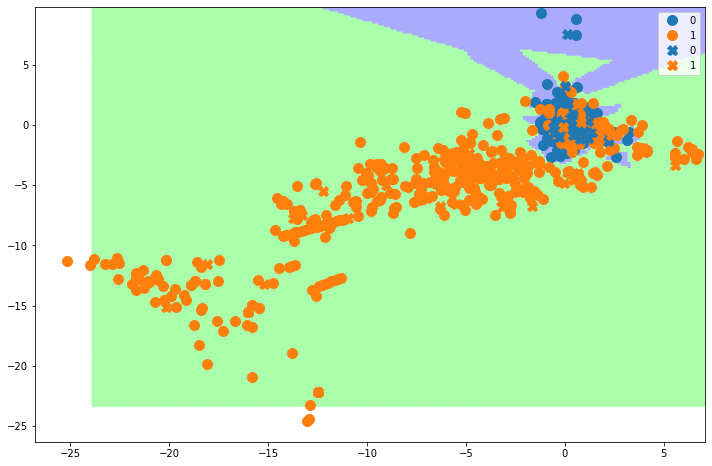

In [14]:
import numpy as np
from matplotlib.colors import ListedColormap
#creiamo una colormap per mostrare le regioni di decisione
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA' ])
import matplotlib.patches as mpatches

def plot2d(data, label_suffix='', marker='o'):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data[data['C']==c].X.values,data[data['C']==c].Y.values, '.',label=c, marker=marker, markersize=10)

def plot_knn_decision_boundary(data, knn):
    plot2d(data)
    X = np.linspace(data['X'].min()*0.95, data['X'].max()*1.05,200)
    Y = np.linspace(data['Y'].min()*0.95, data['Y'].max()*1.05,200)
    X,Y = np.meshgrid(X,Y)

    Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
    #costruiamo un dizionario per transformare le stringhe in indici
    class_dict = {c:i for i,c in enumerate(knn.classes_)}

    Z=list(map(lambda x: class_dict[x],Z))
    Z = np.array(Z).reshape(X.shape)

    plt.pcolormesh(X, Y, Z, antialiased=True, cmap=cmap_light)
    #plt.contour(X,Y,Z)
    
plt.figure(figsize=(12,8))
plot_knn_decision_boundary(df,df_knn_1)
plt.gca().set_prop_cycle(None)
plot2d(dfTest,label_suffix=' test', marker='X')
plt.legend()
plt.show()

Migliore accuracy di test: 0.70
Migliore k: 5.00


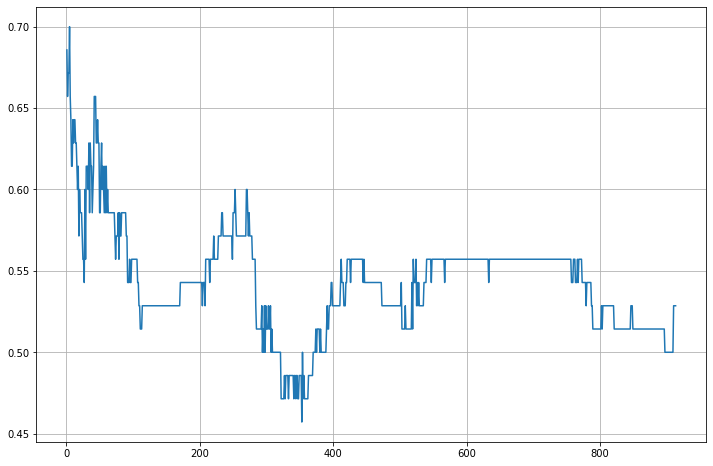

In [15]:
test_accuracies = []
k_values = range(1,len(subsample))

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(subsample.drop('Class',axis=1), subsample.Class)
    test_accuracies.append(knn.score(subsampleTest.drop('Class',axis=1), subsampleTest.Class))
    
best_index = np.argmax(test_accuracies)
best_k = k_values[best_index]
best_accuracy = test_accuracies[best_index]
print("Migliore accuracy di test: %0.2f" % best_accuracy)
print("Migliore k: %0.2f" % best_k)

plt.figure(figsize=(12,8))
plt.plot(k_values,test_accuracies)
plt.grid()
plt.show()

Migliore accuracy di test: 0.96
Migliore k: 2.00


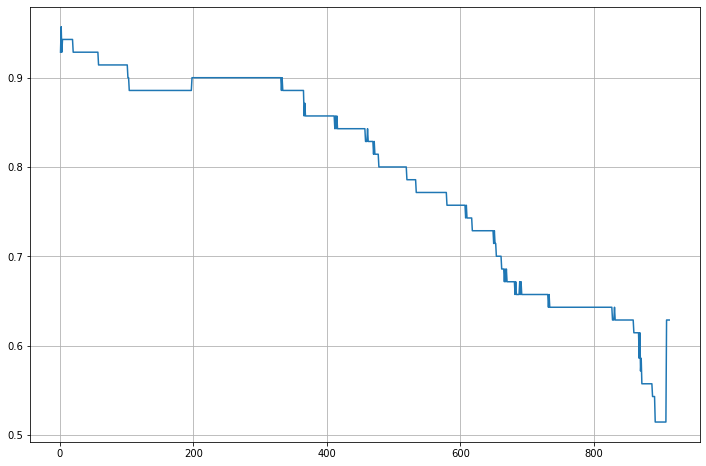

In [16]:
df = pd.DataFrame()
df['X'] = subsample['V17'] 
df['Y'] = subsample['V10']
df['Z'] = subsample['V4']
df['C'] = subsample['Class']

dfTest = pd.DataFrame()
dfTest['X'] = subsampleTest['V17'] 
dfTest['Y'] = subsampleTest['V10']
dfTest['Z'] = subsampleTest['V4']
dfTest['C'] = subsampleTest['Class']
dfTest.head()

test_accuracies = []
k_values = range(1,len(df))

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(df.drop('C',axis=1), df.C)
    test_accuracies.append(knn.score(dfTest.drop('C',axis=1), dfTest.C))
    
best_index = np.argmax(test_accuracies)
best_k = k_values[best_index]
best_accuracy = test_accuracies[best_index]
print("Migliore accuracy di test: %0.2f" % best_accuracy)
print("Migliore k: %0.2f" % best_k)

plt.figure(figsize=(12,8))
plt.plot(k_values,test_accuracies)
plt.grid()
plt.show()

In [17]:
df_knn_2 = KNN(n_neighbors=2)
df_knn_2.fit(df.drop('C',axis=1), df['C'])
print("Accuracy sul training set: %0.2f" % df_knn_2.score(df.drop('C',axis=1), df['C']))
print("Accuracy sul test set: %0.2f" % df_knn_2.score(dfTest.drop('C',axis=1), dfTest['C']))

Accuracy sul training set: 0.95
Accuracy sul test set: 0.96


In [18]:
from sklearn.metrics import confusion_matrix
predizione = df_knn_2.predict(dfTest.drop('C',axis=1))
tn, fp, fn, tp = confusion_matrix(dfTest['C'], predizione).ravel()
print("Numero di True Negative: ", tn)
print("Numero di False Positive: ", fp)
print("Numero di False Negative: ", fn)
print("Numero di True Positive: ", tp)

Numero di True Negative:  35
Numero di False Positive:  0
Numero di False Negative:  3
Numero di True Positive:  32


In [19]:
def condense(data, target):
    #utilizzeremo l'array "selected" per tenere traccia dei campioni che sono stati
    #selezionati dall'algoritmo. In particolare, gli indici "i" in corrispondenza dei quali
    #selected[i] è diverso da zero, indicano che data[i] è stato selezionato dall'algoritmo
    #inizializziamo selected con degli zeri. Nessun dato è stato selezionato
    selected = np.zeros(len(data)).astype(bool)

    #Step 1: selezioniamo un campione casuale e mettiamolo nell'insieme degli elementi selezionati
    i = np.random.choice(range(len(data))) #scegliamo un indice casuale
    selected[i] = 1

    knn = KNN(n_neighbors=1)
    #Step 2: classifichiamo ogni campione non selezionato utilizzando i campioni selezionati come training set
    #ripetiamo la procedura finché non abbiamo più nessun campione da inserire
    finished = False
    while not finished: #finché la variabile finished è False
        #questa variabile ci ricorda se abbiamo inserito nuovi elementi in questa iterazione del while
        selected_new_elements = False
        for i in range(len(data)): #per ogni campione
            if not selected[i]: #se il campione non è stato selezionato
                knn.fit(data[selected],target[selected]) #alleniamo il knn con i campioni selezionati
                if knn.predict(data[i].reshape((1,2)))[0]!=target[i]: #se il campione è statoclassificato male
                    selected[i]=1 #selezioniamolo
                    selected_new_elements = True #e indichiamo che abbiamo selezionato almenoun nuovo elemento
        if selected_new_elements == False: #se finito il for non abbiamo selezionato nessun nuovo elemento
            finished=True #allora bbiamo finito
    return data[selected], target[selected] #restituiamo solo i dati che sono stati selezionati

In [23]:
df = pd.DataFrame()
df['X'] = subsample['V17'] 
df['Y'] = subsample['V10']
#df['Z'] = subsample['V4']
df['C'] = subsample['Class']

dfTest = pd.DataFrame()
dfTest['X'] = subsampleTest['V17'] 
dfTest['Y'] = subsampleTest['V10']
#dfTest['Z'] = subsampleTest['V4']
dfTest['C'] = subsampleTest['Class']

condensed_data, condensed_target = condense(df.drop('C',axis=1).values, df['C'].values)
data_condensed = pd.DataFrame()
data_condensed['X'] = condensed_data[:,0]
data_condensed['Y'] = condensed_data[:,1]
data_condensed['C'] = condensed_target
print("Numero di campioni nel training set: %d" % len(df))
print("Numero di campioni nel training set condensato: %d" % len(data_condensed))
print("Percentuale di dati rimossi: %0.2f" % (float(len(df)-len(data_condensed))/len(df)*100))

Numero di campioni nel training set: 914
Numero di campioni nel training set condensato: 207
Percentuale di dati rimossi: 77.35


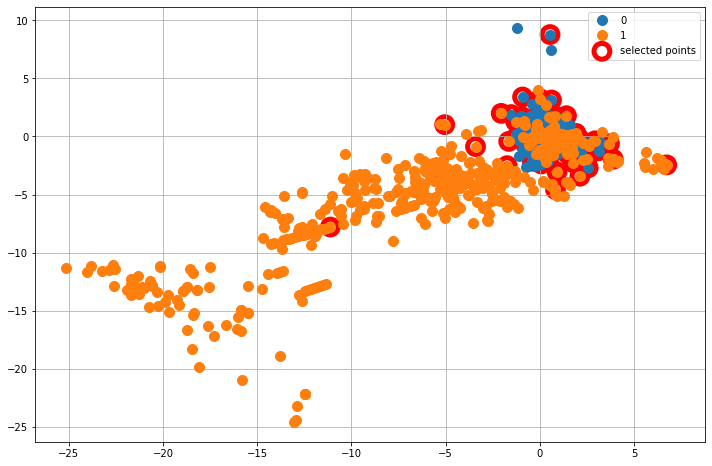

In [25]:
plt.figure(figsize=(12,8))
plot2d(df)
plt.scatter(data_condensed.X, data_condensed.Y, 250,facecolors='none',edgecolors='r', linewidth=5, label='selected points')
plt.grid()
plt.legend()
plt.show()

In [26]:
knn = KNN(n_neighbors=1)
knn_condensed = KNN(n_neighbors=1)
knn.fit(df.drop('C',axis=1), df['C'])
knn_condensed.fit(data_condensed.drop('C',axis=1), data_condensed['C'])
print("Accuracy di test per 1-NN su training set originale: %0.2f" % \
knn.score(dfTest.drop('C',axis=1), dfTest.C))
print("Accuracy di test per 1-NN su training set condensato: %0.2f" % \
knn_condensed.score(dfTest.drop('C',axis=1), dfTest.C))

Accuracy di test per 1-NN su training set originale: 0.93
Accuracy di test per 1-NN su training set condensato: 0.93


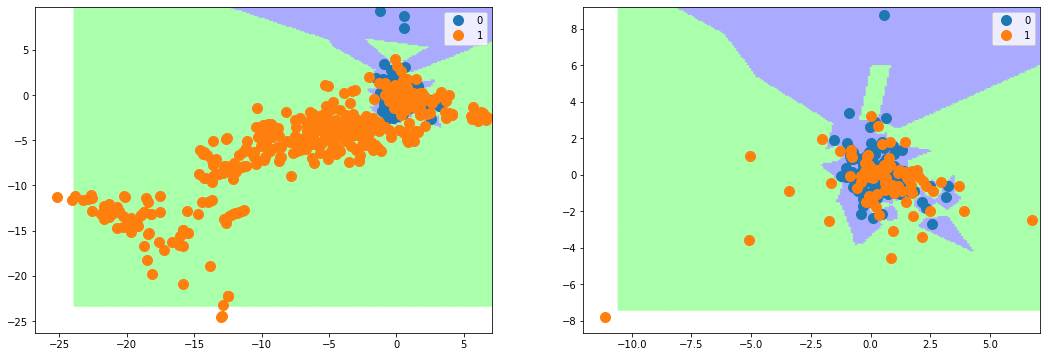

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plot_knn_decision_boundary(df,knn)
plt.legend()
plt.subplot(122)
plot_knn_decision_boundary(data_condensed,knn_condensed)
plt.legend()
plt.show()

In [30]:
def multiedit(data, target, s=5, T=3):
    #L'algoritmo ha due parametri: s e T. Noi scegliamo
    #s=5 (5 split) e T=3 (termina dopo tre iterazione senza errori di classificazione)
    #come parametri di default

    #otteniamo una lista di tutti gli indici dei dati
    all_indices = np.array(range(len(data)))
    #finished indica quando abbiamo finito
    finished = False
    #teniamo traccia delle iterazioni passate dall'ultima volta che abbiamo scartato un campione
    iterations_since_last_change = 0
    knn = KNN(n_neighbors=1)
    while not finished:
        #indica se abbiamo modificato il set in questa iterazione
        edited = False

        #suddividiamo gli indici in 3 split casuali
        #per far si che gli split siano casuali, prima effettuiamo una permutazione degli indici
        split_indices = np.array_split(np.random.permutation(all_indices),s)

        #questa lista conterrà tutti gli indici degli elementi che sono stati classificati male
        #e vanno rimossi
        mark_for_removal = []
        #per ogni split
        for i in range(s):
            #calcoliamo gli indici degli elementi di training e test
            j = (i+1)%s
            idx_test = split_indices[i]
            idx_train = split_indices[j]

            #alleniamo il classificatore 1-NN usando gli elementi di training
            knn.fit(data[idx_train],target[idx_train])
            #classifichiamo gli elementi di test
            predictions = knn.predict(data[idx_test])
            #contrassegnamo per la rimozione tutti gli elementi che sono stati classificati male
            mark_for_removal.extend(idx_test[np.where(predictions!=target[idx_test])])
            #se abbiamo classificato male qualche campione, impostiamo edited a True
            if all(predictions!=target[idx_test]):
                edited = True

        #rimuoviamo gli indici che avevamo contrassegnato per la rimozione
        all_indices = np.setdiff1d(all_indices, mark_for_removal)

        #se non abbiamo modificato il set
        if not edited:
        #incrementiamo il numero di iterazioni dall'ultimo cambiamento
            iterations_since_last_change+=1

        #condizione di terminazione
        if iterations_since_last_change>=T:
            finished=True

    #restituiamo il nuovo set
    return data[all_indices], target[all_indices]

In [32]:
multiedited_data, multiedited_target = multiedit(df.drop('C',axis=1).values, df['C'].values)
data_multiedited = pd.DataFrame()
data_multiedited['X'] = multiedited_data[:,0]
data_multiedited['Y'] = multiedited_data[:,1]
data_multiedited['C'] = multiedited_target

In [38]:
knn = KNN(n_neighbors=1)
knn_multiedited = KNN(n_neighbors=1)
knn.fit(df.drop('C',axis=1), df.C)
knn_multiedited.fit(data_multiedited.drop('C',axis=1), data_multiedited.C)
print("Accuracy di test per 1-NN su training set originale: %0.2f" % \
    knn.score(dfTest.drop('C',axis=1), dfTest.C))
print("Accuracy di test per 1-NN su training set multieditato: %0.2f" % \
    knn_multiedited.score(dfTest.drop('C',axis=1), dfTest.C))

Accuracy di test per 1-NN su training set originale: 0.93
Accuracy di test per 1-NN su training set multieditato: 0.93


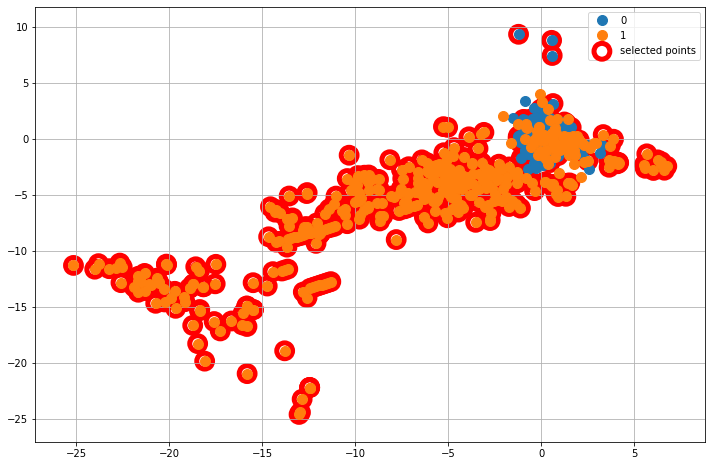

In [39]:
plt.figure(figsize=(12,8))
plot2d(df)
plt.scatter(data_multiedited.X, data_multiedited.Y, 250,
facecolors='none',edgecolors='r', linewidth=5, label='selected points')
plt.grid()
plt.legend()
plt.show()

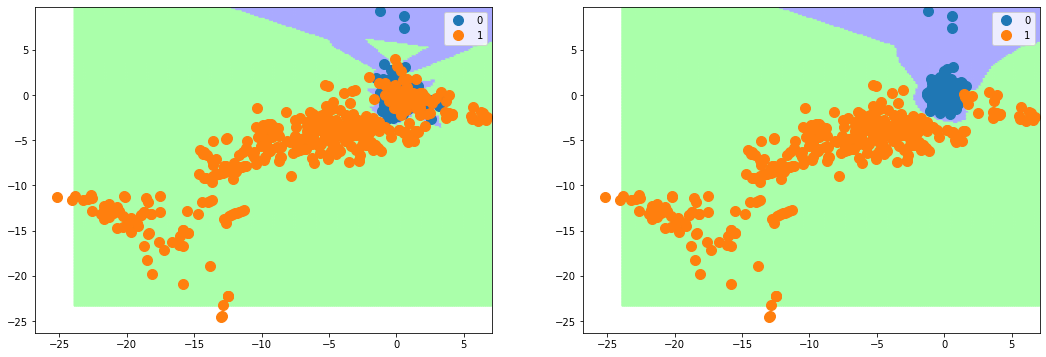

In [40]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plot_knn_decision_boundary(df,knn)
plt.legend()
plt.subplot(122)
plot_knn_decision_boundary(data_multiedited,knn_multiedited)
plt.legend()
plt.show()

Numero di campioni nel training set: 914
Numero di campioni nel training set condensato: 207
Percentuale di dati rimossi: 77.35
Accuracy di test per 1-NN su training set multieditato: 0.93
Accuracy di test per 1-NN su training set multieditato e condensato: 0.91


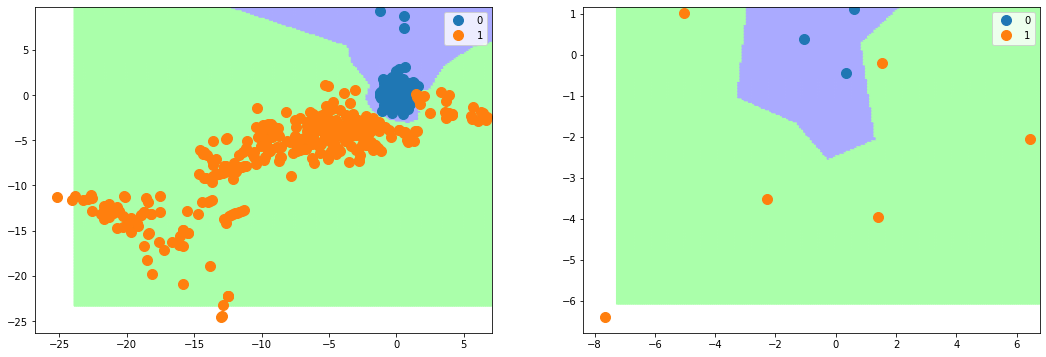

In [44]:
multiedited_condensed_data, multiedited_condensed_target = condense(data_multiedited.drop('C',axis=1).values,data_multiedited.C.values)
data_multiedited_condensed = pd.DataFrame()
data_multiedited_condensed['X'] = multiedited_condensed_data[:,0]
data_multiedited_condensed['Y'] = multiedited_condensed_data[:,1]
data_multiedited_condensed['C'] = multiedited_condensed_target
print("Numero di campioni nel training set: %d" % len(df))
print("Numero di campioni nel training set condensato: %d" % len(data_condensed))
print("Percentuale di dati rimossi: %0.2f" % (float(len(df)-len(data_condensed))/len(df)*100))
knn_multiedited = KNN(n_neighbors=1)
knn_multiedited_condensed = KNN(n_neighbors=1)
knn_multiedited.fit(data_multiedited.drop('C',axis=1), data_multiedited.C)
knn_multiedited_condensed.fit(data_multiedited_condensed.drop('C',axis=1), data_multiedited_condensed.C)
print("Accuracy di test per 1-NN su training set multieditato: %0.2f" % \
knn_multiedited.score(dfTest.drop('C',axis=1), dfTest.C))
print("Accuracy di test per 1-NN su training set multieditato e condensato: %0.2f" % \
knn_multiedited_condensed.score(dfTest.drop('C',axis=1), dfTest.C))

plt.figure(figsize=(18,6))
plt.subplot(121)
plot_knn_decision_boundary(data_multiedited,knn_multiedited)
plt.legend()
plt.subplot(122)
plot_knn_decision_boundary(data_multiedited_condensed,knn_multiedited_condensed)
plt.legend()
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression

df_lgr = LogisticRegression(solver='lbfgs')
df_lgr.fit(df.drop('C',axis=1), df['C'])
print("Accuracy sul training set: %0.2f" % df_lgr.score(df.drop('C',axis=1), df['C']))
print("Accuracy sul test set: %0.2f" % df_lgr.score(dfTest.drop('C',axis=1), dfTest['C']))

Accuracy sul training set: 0.90
Accuracy sul test set: 0.93


In [69]:
subsample_lgr = LogisticRegression(solver='lbfgs')
subsample_lgr.fit(subsample.drop('Class',axis=1), subsample['Class'])
print("Accuracy sul training set: %0.2f" % subsample_lgr.score(subsample.drop('Class',axis=1), subsample['Class']))
print("Accuracy sul test set: %0.2f" % subsample_lgr.score(subsampleTest.drop('Class',axis=1), subsampleTest['Class']))

Accuracy sul training set: 0.92
Accuracy sul test set: 0.94


In [70]:
df = pd.DataFrame()
df['X'] = subsample['V17'] 
df['Y'] = subsample['V10']
df['Z'] = subsample['V4']
df['C'] = subsample['Class']

dfTest = pd.DataFrame()
dfTest['X'] = subsampleTest['V17'] 
dfTest['Y'] = subsampleTest['V10']
dfTest['Z'] = subsampleTest['V4']
dfTest['C'] = subsampleTest['Class']

df_lgr = LogisticRegression(solver='lbfgs')
df_lgr.fit(df.drop('C',axis=1), df['C'])
print("Accuracy sul training set: %0.2f" % df_lgr.score(df.drop('C',axis=1), df['C']))
print("Accuracy sul test set: %0.2f" % df_lgr.score(dfTest.drop('C',axis=1), dfTest['C']))

Accuracy sul training set: 0.93
Accuracy sul test set: 0.94
